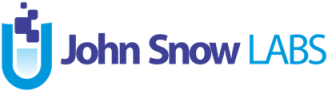

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/JohnSnowLabs/langtest/blob/main/demo/tutorials/benchmarks/OpenbookQA_benchmarks.ipynb)

**LangTest** is an open-source python library designed to help developers deliver safe and effective Natural Language Processing (NLP) models. Whether you are using **John Snow Labs, Hugging Face, Spacy** models or **OpenAI, Cohere, AI21, Hugging Face Inference API and Azure-OpenAI** based LLMs, it has got you covered. You can test any Named Entity Recognition (NER), Text Classification model using the library. We also support testing LLMS for Question-Answering and Summarization tasks on benchmark datasets. The library supports 50+ out of the box tests. These tests fall into robustness, accuracy, bias, representation and fairness test categories.

Metrics are calculated by comparing the model's extractions in the original list of sentences against the extractions carried out in the noisy list of sentences. The original annotated labels are not used at any point, we are simply comparing the model against itself in a 2 settings.

# Getting started with LangTest

In [ ]:
!pip install "langtest[openai,ai21,transformers]"

# Harness and Its Parameters

The Harness class is a testing class for Natural Language Processing (NLP) models. It evaluates the performance of a NLP model on a given task using test data and generates a report with test results.Harness can be imported from the LangTest library in the following way.

In [ ]:
from langtest import Harness

### Initial Setup

In [5]:
import pandas as pd
import random
pd.set_option('display.max_colwidth', None)

In [6]:
import os
os.environ["AI21_API_KEY"] = "<YOUR_API_KEY>"
os.environ["OPENAI_API_KEY"] = "<YOUR_API_KEY>"

It imports the Harness class from within the module, that is designed to provide a blueprint or framework for conducting NLP testing, and that instances of the Harness class can be customized or configured for different testing scenarios or environments.

Here is a list of the different parameters that can be passed to the Harness function:

<br/>


| Parameter  | Description |  
| - | - | 
|**task**     |Task for which the model is to be evaluated (question-answering or summarization)|
| **model**     | Specifies the model(s) to be evaluated. This parameter can be provided as either a dictionary or a list of dictionaries. Each dictionary should contain the following keys: <ul><li>model (mandatory): 	PipelineModel or path to a saved model or pretrained pipeline/model from hub.</li><li>hub (mandatory): Hub (library) to use in back-end for loading model from public models hub or from path</li></ul>|
| **data**      | The data to be used for evaluation. A dictionary providing flexibility and options for data sources. It should include the following keys: <ul><li>data_source (mandatory): The source of the data.</li><li>subset (optional): The subset of the data.</li><li>feature_column (optional): The column containing the features.</li><li>target_column (optional): The column containing the target labels.</li><li>split (optional): The data split to be used.</li><li>source (optional): Set to 'huggingface' when loading Hugging Face dataset.</li></ul> |
| **config**    | Configuration for the tests to be performed, specified in the form of a YAML file. |

<br/>
<br/>

## Model J2-Jumbo-Instruct

### Setup and Configure Harness

In [5]:
harness = Harness(
                  task="question-answering",
                  model={"model": "j2-jumbo-instruct", "hub":"ai21"},
                  data={"data_source" :"OpenBookQA",
                        "split":"test"}
                  )

Test Configuration : 
 {
 "model_parameters": {
  "temperature": 0.2,
  "maxTokens": 64
 },
 "tests": {
  "defaults": {
   "min_pass_rate": 1.0
  },
  "robustness": {
   "add_typo": {
    "min_pass_rate": 0.7
   },
   "lowercase": {
    "min_pass_rate": 0.7
   }
  }
 }
}


In [6]:
harness.configure(
{
 "evaluation": {"metric":"QAEvalChain","model":"gpt-3.5-turbo-instruct","hub":"openai"},
 'tests': {'defaults': {'min_pass_rate': 0.65},
           'robustness': {'uppercase': {'min_pass_rate': 0.75},
                          'lowercase':{'min_pass_rate': 0.75},
                          'titlecase':{'min_pass_rate': 0.75},
                          'add_typo':{'min_pass_rate': 0.75},
                          'dyslexia_word_swap':{'min_pass_rate': 0.75},
                          'add_abbreviation':{'min_pass_rate': 0.75},
                          'add_slangs':{'min_pass_rate': 0.75},
                          'add_speech_to_text_typo':{'min_pass_rate': 0.75},
                          'add_ocr_typo':{'min_pass_rate': 0.75},
                          'adjective_synonym_swap':{'min_pass_rate': 0.75},
                          'adjective_antonym_swap':{'min_pass_rate': 0.75}
                        }
          }
 }
)

{'evaluation': {'metric': 'QAEvalChain',
  'model': 'gpt-3.5-turbo-instruct',
  'hub': 'openai'},
 'tests': {'defaults': {'min_pass_rate': 0.65},
  'robustness': {'uppercase': {'min_pass_rate': 0.75},
   'lowercase': {'min_pass_rate': 0.75},
   'titlecase': {'min_pass_rate': 0.75},
   'add_typo': {'min_pass_rate': 0.75},
   'dyslexia_word_swap': {'min_pass_rate': 0.75},
   'add_abbreviation': {'min_pass_rate': 0.75},
   'add_slangs': {'min_pass_rate': 0.75},
   'add_speech_to_text_typo': {'min_pass_rate': 0.75},
   'add_ocr_typo': {'min_pass_rate': 0.75},
   'adjective_synonym_swap': {'min_pass_rate': 0.75},
   'adjective_antonym_swap': {'min_pass_rate': 0.75}}}}

### Generating the test cases

In [13]:
seed_value = 42
random.seed(seed_value)
harness.generate()

Generating testcases...: 100%|██████████| 1/1 [00:00<00:00, 8050.49it/s]
[W010] - Test 'add_typo': 21 samples removed out of 500
[W010] - Test 'dyslexia_word_swap': 85 samples removed out of 500
[W010] - Test 'add_abbreviation': 60 samples removed out of 500
[W010] - Test 'add_slangs': 193 samples removed out of 500
[W010] - Test 'add_ocr_typo': 2 samples removed out of 500
[W010] - Test 'adjective_synonym_swap': 133 samples removed out of 500
[W010] - Test 'adjective_antonym_swap': 193 samples removed out of 500



In [14]:
harness.testcases()

,category,test_type,original_context,original_question,perturbed_context,perturbed_question
0,robustness,uppercase,-,A person wants to start saving money so that t...,-,A PERSON WANTS TO START SAVING MONEY SO THAT T...
1,robustness,uppercase,-,There is most likely going to be fog around:\n...,-,THERE IS MOST LIKELY GOING TO BE FOG AROUND: A...
2,robustness,uppercase,-,Predators eat\n\nA. lions\nB. humans\nC. bunni...,-,PREDATORS EAT A. LIONS B. HUMANS C. BUNNIES D....
3,robustness,uppercase,-,Oak tree seeds are planted and a sidewalk is p...,-,OAK TREE SEEDS ARE PLANTED AND A SIDEWALK IS P...
4,robustness,uppercase,-,An electric car runs on electricity via\n\nA. ...,-,AN ELECTRIC CAR RUNS ON ELECTRICITY VIA A. GAS...
...,...,...,...,...,...,...
4808,robustness,adjective_antonym_swap,-,"A woman, with a pale complexion, wants to spen...",-,"A woman, with a pale complexion, wants to spen..."
4809,robustness,adjective_antonym_swap,-,Pasta may be cooked in water when\n\nA. the wa...,-,Pasta may be raw in water when\n\nA. the water...
4810,robustness,adjective_antonym_swap,-,A decrease in diseases\n\nA. has no impact on ...,-,A decrease in diseases\n\nA. has no impact on ...
4811,robustness,adjective_antonym_swap,-,"When soil is viewed in a scientific way, what ...",-,"When soil is viewed in a unscientific way, wha..."


### saving testcases

In [16]:
harness.save("saved_test_configurations/OpenBookQA")

### Running the tests

In [17]:
harness.run()

Running testcases... : 100%|██████████| 4813/4813 [2:01:16<00:00,  1.51s/it]  


### saving model reponse (expected_result and actual_result)

In [9]:
harness.save(save_dir=r"ai21/j2-jumbo-instruct-OpenBookQA", include_generated_results =True)

### Generated Results

In [9]:
generated_results = harness.generated_results()

In [10]:
generated_results

,category,test_type,original_context,original_question,perturbed_context,perturbed_question,expected_result,actual_result,pass
0,robustness,uppercase,-,"A person wants to start saving money so that they can afford a nice vacation at the end of the year. After looking over their budget and expenses, they decide the best way to save money is to\n\nA. make more phone calls\nB. quit eating lunch out\nC. buy less with monopoly money\nD. have lunch with friends",-,"A PERSON WANTS TO START SAVING MONEY SO THAT THEY CAN AFFORD A NICE VACATION AT THE END OF THE YEAR. AFTER LOOKING OVER THEIR BUDGET AND EXPENSES, THEY DECIDE THE BEST WAY TO SAVE MONEY IS TO A. MAKE MORE PHONE CALLS B. QUIT EATING LUNCH OUT C. BUY LESS WITH MONOPOLY MONEY D. HAVE LUNCH WITH FRIENDS",B. quit eating lunch out,B. QUIT EATING LUNCH OUT,True
1,robustness,uppercase,-,There is most likely going to be fog around:\n\nA. a marsh\nB. a tundra\nC. the plains\nD. a desert,-,THERE IS MOST LIKELY GOING TO BE FOG AROUND: A. A MARSH B. A TUNDRA C. THE PLAINS D. A DESERT,A marsh,"C. THE PLAINS\n Explanation: PLAINS are flat and open areas, and fog is often formed on flat and open areas.",True
2,robustness,uppercase,-,Predators eat\n\nA. lions\nB. humans\nC. bunnies\nD. grass,-,PREDATORS EAT A. LIONS B. HUMANS C. BUNNIES D. GRASS,B. humans,LIONS,False
3,robustness,uppercase,-,"Oak tree seeds are planted and a sidewalk is paved right next to that spot, until eventually, the tree is tall and the roots must extend past the sidewalk, which means\n\nA. roots may be split\nB. roots may begin to die\nC. parts may break the concrete\nD. roots may fall apart",-,"OAK TREE SEEDS ARE PLANTED AND A SIDEWALK IS PAVED RIGHT NEXT TO THAT SPOT, UNTIL EVENTUALLY, THE TREE IS TALL AND THE ROOTS MUST EXTEND PAST THE SIDEWALK, WHICH MEANS A. ROOTS MAY BE SPLIT B. ROOTS MAY BEGIN TO DIE C. PARTS MAY BREAK THE CONCRETE D. ROOTS MAY FALL APART",A. roots may be split,A. ROOTS MAY BE SPLIT,True
4,robustness,uppercase,-,An electric car runs on electricity via\n\nA. gasoline\nB. a power station\nC. electrical conductors\nD. fuel,-,AN ELECTRIC CAR RUNS ON ELECTRICITY VIA A. GASOLINE B. A POWER STATION C. ELECTRICAL CONDUCTORS D. FUEL,B. a power station,A POWER STATION,True
...,...,...,...,...,...,...,...,...,...
4808,robustness,adjective_antonym_swap,-,"A woman, with a pale complexion, wants to spend the bright, sunny day at the beach. She makes sure that she stops at the store to pick up some sunblock before she begins to enjoy her day filled with sand and surf. She applies the sunblock carefully and thoroughly, because she knows that\n\nA. UV rays are harmful\nB. sunlight will be fun\nC. the sun is close\nD. the sun is in space",-,"A woman, with a pale complexion, wants to spend the dull, sunny day at the beach. She makes sure that she stops at the store to pick up no sunblock before she begins to enjoy her day filled with sand and surf. She applies the sunblock carefully and thoroughly, because she knows that\n\nA. UV rays are harmless\nB. sunlight will be fun\nC. the sun is distant\nD. the sun is in space",A. UV rays are harmful,D. the sun is in space,False
4809,robustness,adjective_antonym_swap,-,Pasta may be cooked in water when\n\nA. the water is warm\nB. the water is on the stove\nC. water is bubbling from applied warmth\nD. the pasta is very fresh,-,Pasta may be raw in water when\n\nA. the water is cool\nB. the water is on the stove\nC. water is bubbling from applied warmth\nD. the pasta is very salty,A. the water is warm,C. water is bubbling from applied warmth,False
4810,robustness,adjective_antonym_swap,-,A decrease in diseases\n\nA. has no impact on a population\nB. leads to more sick people\nC. leads to less sick people\nD. leads to an uptick in emergency room visits,-,A decrease in diseases\n\nA. has no impact on a population\nB. leads to more well people\nC. leads to less well people\nD. leads to an uptick in emergency room visits,C. leads to less sick people,B. leads to more well peop

### Final Results

In [11]:
report = harness.report()

In [12]:
report

,category,test_type,fail_count,pass_count,pass_rate,minimum_pass_rate,pass
0,robustness,uppercase,208,292,58%,75%,False
1,robustness,lowercase,185,315,63%,75%,False
2,robustness,titlecase,199,301,60%,75%,False
3,robustness,add_typo,126,353,74%,75%,False
4,robustness,dyslexia_word_swap,142,273,66%,75%,False
5,robustness,add_abbreviation,183,257,58%,75%,False
6,robustness,add_slangs,126,181,59%,75%,False
7,robustness,add_speech_to_text_typo,110,390,78%,75%,True
8,robustness,add_ocr_typo,246,252,51%,75%,False
9,robustness,adjective_synonym_swap,139,228,62%,75%,False


### Saving report and generated_results

In [13]:
generated_results.to_csv('ai21/j2-jumbo-instruct-OpenBookQA.csv', index=False)

In [14]:
report.to_csv('ai21/j2-jumbo-instruct-OpenBookQA-report.csv', index=False)

## Model J2-Grande-Instruct

### Setup and Configure Harness

In [17]:
harness = Harness(
                  task="question-answering",
                  model={"model": "j2-grande-instruct", "hub":"ai21"},
                  data={"data_source" :"OpenBookQA",
                        "split":"test"}
                  )

Test Configuration : 
 {
 "model_parameters": {
  "temperature": 0.2,
  "maxTokens": 64
 },
 "tests": {
  "defaults": {
   "min_pass_rate": 1.0
  },
  "robustness": {
   "add_typo": {
    "min_pass_rate": 0.7
   },
   "lowercase": {
    "min_pass_rate": 0.7
   }
  }
 }
}


In [18]:
harness.configure(
{
 "evaluation": {"metric":"QAEvalChain","model":"gpt-3.5-turbo-instruct","hub":"openai"},
 'tests': {'defaults': {'min_pass_rate': 0.65},
           'robustness': {'uppercase': {'min_pass_rate': 0.75},
                          'lowercase':{'min_pass_rate': 0.75},
                          'titlecase':{'min_pass_rate': 0.75},
                          'add_typo':{'min_pass_rate': 0.75},
                          'dyslexia_word_swap':{'min_pass_rate': 0.75},
                          'add_abbreviation':{'min_pass_rate': 0.75},
                          'add_slangs':{'min_pass_rate': 0.75},
                          'add_speech_to_text_typo':{'min_pass_rate': 0.75},
                          'add_ocr_typo':{'min_pass_rate': 0.75},
                          'adjective_synonym_swap':{'min_pass_rate': 0.75},
                          'adjective_antonym_swap':{'min_pass_rate': 0.75}
                        }
          }
 }
)

{'evaluation': {'metric': 'QAEvalChain',
  'model': 'gpt-3.5-turbo-instruct',
  'hub': 'openai'},
 'tests': {'defaults': {'min_pass_rate': 0.65},
  'robustness': {'uppercase': {'min_pass_rate': 0.75},
   'lowercase': {'min_pass_rate': 0.75},
   'titlecase': {'min_pass_rate': 0.75},
   'add_typo': {'min_pass_rate': 0.75},
   'dyslexia_word_swap': {'min_pass_rate': 0.75},
   'add_abbreviation': {'min_pass_rate': 0.75},
   'add_slangs': {'min_pass_rate': 0.75},
   'add_speech_to_text_typo': {'min_pass_rate': 0.75},
   'add_ocr_typo': {'min_pass_rate': 0.75},
   'adjective_synonym_swap': {'min_pass_rate': 0.75},
   'adjective_antonym_swap': {'min_pass_rate': 0.75}}}}

### Generating the test cases.

In [9]:
seed_value = 42
random.seed(seed_value)
harness.generate()

Generating testcases...: 100%|██████████| 1/1 [00:00<00:00, 8867.45it/s]
[W010] - Test 'add_typo': 21 samples removed out of 500
[W010] - Test 'dyslexia_word_swap': 85 samples removed out of 500
[W010] - Test 'add_abbreviation': 60 samples removed out of 500
[W010] - Test 'add_slangs': 193 samples removed out of 500
[W010] - Test 'add_ocr_typo': 2 samples removed out of 500
[W010] - Test 'adjective_synonym_swap': 133 samples removed out of 500
[W010] - Test 'adjective_antonym_swap': 193 samples removed out of 500



In [10]:
harness.testcases()

,category,test_type,original_context,original_question,perturbed_context,perturbed_question
0,robustness,uppercase,-,A person wants to start saving money so that t...,-,A PERSON WANTS TO START SAVING MONEY SO THAT T...
1,robustness,uppercase,-,There is most likely going to be fog around:\n...,-,THERE IS MOST LIKELY GOING TO BE FOG AROUND: A...
2,robustness,uppercase,-,Predators eat\n\nA. lions\nB. humans\nC. bunni...,-,PREDATORS EAT A. LIONS B. HUMANS C. BUNNIES D....
3,robustness,uppercase,-,Oak tree seeds are planted and a sidewalk is p...,-,OAK TREE SEEDS ARE PLANTED AND A SIDEWALK IS P...
4,robustness,uppercase,-,An electric car runs on electricity via\n\nA. ...,-,AN ELECTRIC CAR RUNS ON ELECTRICITY VIA A. GAS...
...,...,...,...,...,...,...
4808,robustness,adjective_antonym_swap,-,"A woman, with a pale complexion, wants to spen...",-,"A woman, with a pale complexion, wants to spen..."
4809,robustness,adjective_antonym_swap,-,Pasta may be cooked in water when\n\nA. the wa...,-,Pasta may be raw in water when\n\nA. the water...
4810,robustness,adjective_antonym_swap,-,A decrease in diseases\n\nA. has no impact on ...,-,A decrease in diseases\n\nA. has no impact on ...
4811,robustness,adjective_antonym_swap,-,"When soil is viewed in a scientific way, what ...",-,"When soil is viewed in a unscientific way, wha..."


### Running the tests

In [12]:
harness.run()

Running testcases... : 100%|██████████| 4813/4813 [00:46<00:00, 103.12it/s] 


### saving model reponse (expected_result and actual_result)

In [21]:
harness.save(save_dir=r"ai21/j2-grande-instruct-OpenBookQA", include_generated_results =True)

In [23]:
generated_results = harness.generated_results()

In [24]:
generated_results

,category,test_type,original_context,original_question,perturbed_context,perturbed_question,expected_result,actual_result,pass
0,robustness,uppercase,-,"A person wants to start saving money so that they can afford a nice vacation at the end of the year. After looking over their budget and expenses, they decide the best way to save money is to\n\nA. make more phone calls\nB. quit eating lunch out\nC. buy less with monopoly money\nD. have lunch with friends",-,"A PERSON WANTS TO START SAVING MONEY SO THAT THEY CAN AFFORD A NICE VACATION AT THE END OF THE YEAR. AFTER LOOKING OVER THEIR BUDGET AND EXPENSES, THEY DECIDE THE BEST WAY TO SAVE MONEY IS TO A. MAKE MORE PHONE CALLS B. QUIT EATING LUNCH OUT C. BUY LESS WITH MONOPOLY MONEY D. HAVE LUNCH WITH FRIENDS",B. quit eating lunch out,"C. BUY LESS WITH MONOPOLY MONEY\n\nThe best way to save money in this situation is to buy less with Monopoly money. Making more phone calls or quitting eating out will not directly result in saving money. Having lunch with friends is not a cost-effective way to save money, as eating out is typically more expensive than preparing meals at home.",False
1,robustness,uppercase,-,There is most likely going to be fog around:\n\nA. a marsh\nB. a tundra\nC. the plains\nD. a desert,-,THERE IS MOST LIKELY GOING TO BE FOG AROUND: A. A MARSH B. A TUNDRA C. THE PLAINS D. A DESERT,a marsh,A MARSH,True
2,robustness,uppercase,-,Predators eat\n\nA. lions\nB. humans\nC. bunnies\nD. grass,-,PREDATORS EAT A. LIONS B. HUMANS C. BUNNIES D. GRASS,C. bunnies,LIONS,False
3,robustness,uppercase,-,"Oak tree seeds are planted and a sidewalk is paved right next to that spot, until eventually, the tree is tall and the roots must extend past the sidewalk, which means\n\nA. roots may be split\nB. roots may begin to die\nC. parts may break the concrete\nD. roots may fall apart",-,"OAK TREE SEEDS ARE PLANTED AND A SIDEWALK IS PAVED RIGHT NEXT TO THAT SPOT, UNTIL EVENTUALLY, THE TREE IS TALL AND THE ROOTS MUST EXTEND PAST THE SIDEWALK, WHICH MEANS A. ROOTS MAY BE SPLIT B. ROOTS MAY BEGIN TO DIE C. PARTS MAY BREAK THE CONCRETE D. ROOTS MAY FALL APART",C. parts may break the concrete,\nD. ROOTS MAY FALL APART,False
4,robustness,uppercase,-,An electric car runs on electricity via\n\nA. gasoline\nB. a power station\nC. electrical conductors\nD. fuel,-,AN ELECTRIC CAR RUNS ON ELECTRICITY VIA A. GASOLINE B. A POWER STATION C. ELECTRICAL CONDUCTORS D. FUEL,C. electrical conductors,A POWER STATION,False
...,...,...,...,...,...,...,...,...,...
4808,robustness,adjective_antonym_swap,-,"A woman, with a pale complexion, wants to spend the bright, sunny day at the beach. She makes sure that she stops at the store to pick up some sunblock before she begins to enjoy her day filled with sand and surf. She applies the sunblock carefully and thoroughly, because she knows that\n\nA. UV rays are harmful\nB. sunlight will be fun\nC. the sun is close\nD. the sun is in space",-,"A woman, with a pale complexion, wants to spend the dull, sunny day at the beach. She makes sure that she stops at the store to pick up no sunblock before she begins to enjoy her day filled with sand and surf. She applies the sunblock carefully and thoroughly, because she knows that\n\nA. UV rays are harmless\nB. sunlight will be fun\nC. the sun is distant\nD. the sun is in space",A. UV rays are harmful,D. the sun is in space,False
4809,robustness,adjective_antonym_swap,-,Pasta may be cooked in water when\n\nA. the water is warm\nB. the water is on the stove\nC. water is bubbling from applied warmth\nD. the pasta is very fresh,-,Pasta may be raw in water when\n\nA. the water is cool\nB. the water is on the stove\nC. water is bubbling from applied warmth\nD. the pasta is very salty,the water is on the stove,C. water is bubbling from applied warmth,False
4810,robustness,adjective_antonym_swap,-,A decrease in diseases\n\nA. has no impact on a population\nB. leads to more sick people\nC. leads to less sick people\nD. leads to an uptick 

### Final Results

In [25]:
report = harness.report()

In [26]:
report

,category,test_type,fail_count,pass_count,pass_rate,minimum_pass_rate,pass
0,robustness,uppercase,237,263,53%,75%,False
1,robustness,lowercase,220,280,56%,75%,False
2,robustness,titlecase,209,291,58%,75%,False
3,robustness,add_typo,101,378,79%,75%,True
4,robustness,dyslexia_word_swap,142,273,66%,75%,False
5,robustness,add_abbreviation,162,278,63%,75%,False
6,robustness,add_slangs,112,195,64%,75%,False
7,robustness,add_speech_to_text_typo,82,418,84%,75%,True
8,robustness,add_ocr_typo,228,270,54%,75%,False
9,robustness,adjective_synonym_swap,128,239,65%,75%,False


### Saving report and generated_results

In [27]:
generated_results.to_csv('ai21/j2-grande-instruct-OpenBookQA.csv', index=False)

In [28]:
report.to_csv('ai21/j2-grande-instruct-OpenBookQA-report.csv', index=False)

## Model text-davinci-003

### Setup and Configure Harness

In [29]:
harness = Harness(
                  task="question-answering",
                  model={"model": "text-davinci-003", "hub":"openai"},
                  data={"data_source" :"OpenBookQA",
                        "split":"test"}
                  )

Test Configuration : 
 {
 "model_parameters": {
  "temperature": 0.2,
  "max_tokens": 64
 },
 "tests": {
  "defaults": {
   "min_pass_rate": 1.0
  },
  "robustness": {
   "add_typo": {
    "min_pass_rate": 0.7
   },
   "lowercase": {
    "min_pass_rate": 0.7
   }
  }
 }
}


In [30]:
harness.configure(
{
 "evaluation": {"metric":"QAEvalChain","model":"gpt-3.5-turbo-instruct","hub":"openai"},
 'tests': {'defaults': {'min_pass_rate': 0.65},
           'robustness': {'uppercase': {'min_pass_rate': 0.75},
                          'lowercase':{'min_pass_rate': 0.75},
                          'titlecase':{'min_pass_rate': 0.75},
                          'add_typo':{'min_pass_rate': 0.75},
                          'dyslexia_word_swap':{'min_pass_rate': 0.75},
                          'add_abbreviation':{'min_pass_rate': 0.75},
                          'add_slangs':{'min_pass_rate': 0.75},
                          'add_speech_to_text_typo':{'min_pass_rate': 0.75},
                          'add_ocr_typo':{'min_pass_rate': 0.75},
                          'adjective_synonym_swap':{'min_pass_rate': 0.75},
                          'adjective_antonym_swap':{'min_pass_rate': 0.75}
                        }
          }
 }
)

{'evaluation': {'metric': 'QAEvalChain',
  'model': 'gpt-3.5-turbo-instruct',
  'hub': 'openai'},
 'tests': {'defaults': {'min_pass_rate': 0.65},
  'robustness': {'uppercase': {'min_pass_rate': 0.75},
   'lowercase': {'min_pass_rate': 0.75},
   'titlecase': {'min_pass_rate': 0.75},
   'add_typo': {'min_pass_rate': 0.75},
   'dyslexia_word_swap': {'min_pass_rate': 0.75},
   'add_abbreviation': {'min_pass_rate': 0.75},
   'add_slangs': {'min_pass_rate': 0.75},
   'add_speech_to_text_typo': {'min_pass_rate': 0.75},
   'add_ocr_typo': {'min_pass_rate': 0.75},
   'adjective_synonym_swap': {'min_pass_rate': 0.75},
   'adjective_antonym_swap': {'min_pass_rate': 0.75}}}}

### Generating the test cases.

In [9]:
seed_value = 42
random.seed(seed_value)
harness.generate()

Generating testcases...: 100%|██████████| 1/1 [00:00<00:00, 9118.05it/s]
[W010] - Test 'add_typo': 21 samples removed out of 500
[W010] - Test 'dyslexia_word_swap': 85 samples removed out of 500
[W010] - Test 'add_abbreviation': 60 samples removed out of 500
[W010] - Test 'add_slangs': 193 samples removed out of 500
[W010] - Test 'add_ocr_typo': 2 samples removed out of 500
[W010] - Test 'adjective_synonym_swap': 133 samples removed out of 500
[W010] - Test 'adjective_antonym_swap': 193 samples removed out of 500



In [10]:
harness.testcases()

,category,test_type,original_context,original_question,perturbed_context,perturbed_question
0,robustness,uppercase,-,A person wants to start saving money so that t...,-,A PERSON WANTS TO START SAVING MONEY SO THAT T...
1,robustness,uppercase,-,There is most likely going to be fog around:\n...,-,THERE IS MOST LIKELY GOING TO BE FOG AROUND: A...
2,robustness,uppercase,-,Predators eat\n\nA. lions\nB. humans\nC. bunni...,-,PREDATORS EAT A. LIONS B. HUMANS C. BUNNIES D....
3,robustness,uppercase,-,Oak tree seeds are planted and a sidewalk is p...,-,OAK TREE SEEDS ARE PLANTED AND A SIDEWALK IS P...
4,robustness,uppercase,-,An electric car runs on electricity via\n\nA. ...,-,AN ELECTRIC CAR RUNS ON ELECTRICITY VIA A. GAS...
...,...,...,...,...,...,...
4808,robustness,adjective_antonym_swap,-,"A woman, with a pale complexion, wants to spen...",-,"A woman, with a pale complexion, wants to spen..."
4809,robustness,adjective_antonym_swap,-,Pasta may be cooked in water when\n\nA. the wa...,-,Pasta may be raw in water when\n\nA. the water...
4810,robustness,adjective_antonym_swap,-,A decrease in diseases\n\nA. has no impact on ...,-,A decrease in diseases\n\nA. has no impact on ...
4811,robustness,adjective_antonym_swap,-,"When soil is viewed in a scientific way, what ...",-,"When soil is viewed in a unscientific way, wha..."


### Running the tests

In [11]:
harness.run()

Running testcases... : 100%|██████████| 4813/4813 [51:21<00:00,  1.56it/s]


### saving model reponse (expected_result and actual_result)

In [35]:
harness.save(save_dir="openai/text-davinci-003-OpenBookQA", include_generated_results =True)

### Generated Results

In [37]:
generated_results = harness.generated_results()

In [38]:
generated_results

,category,test_type,original_context,original_question,perturbed_context,perturbed_question,expected_result,actual_result,pass
0,robustness,uppercase,-,"A person wants to start saving money so that they can afford a nice vacation at the end of the year. After looking over their budget and expenses, they decide the best way to save money is to\n\nA. make more phone calls\nB. quit eating lunch out\nC. buy less with monopoly money\nD. have lunch with friends",-,"A PERSON WANTS TO START SAVING MONEY SO THAT THEY CAN AFFORD A NICE VACATION AT THE END OF THE YEAR. AFTER LOOKING OVER THEIR BUDGET AND EXPENSES, THEY DECIDE THE BEST WAY TO SAVE MONEY IS TO A. MAKE MORE PHONE CALLS B. QUIT EATING LUNCH OUT C. BUY LESS WITH MONOPOLY MONEY D. HAVE LUNCH WITH FRIENDS",B. quit eating lunch out,B. QUIT EATING LUNCH OUT,True
1,robustness,uppercase,-,There is most likely going to be fog around:\n\nA. a marsh\nB. a tundra\nC. the plains\nD. a desert,-,THERE IS MOST LIKELY GOING TO BE FOG AROUND: A. A MARSH B. A TUNDRA C. THE PLAINS D. A DESERT,A. a marsh,A. A Marsh,True
2,robustness,uppercase,-,Predators eat\n\nA. lions\nB. humans\nC. bunnies\nD. grass,-,PREDATORS EAT A. LIONS B. HUMANS C. BUNNIES D. GRASS,A. lions,A. Lions,True
3,robustness,uppercase,-,"Oak tree seeds are planted and a sidewalk is paved right next to that spot, until eventually, the tree is tall and the roots must extend past the sidewalk, which means\n\nA. roots may be split\nB. roots may begin to die\nC. parts may break the concrete\nD. roots may fall apart",-,"OAK TREE SEEDS ARE PLANTED AND A SIDEWALK IS PAVED RIGHT NEXT TO THAT SPOT, UNTIL EVENTUALLY, THE TREE IS TALL AND THE ROOTS MUST EXTEND PAST THE SIDEWALK, WHICH MEANS A. ROOTS MAY BE SPLIT B. ROOTS MAY BEGIN TO DIE C. PARTS MAY BREAK THE CONCRETE D. ROOTS MAY FALL APART",C. parts may break the concrete,C. PARTS MAY BREAK THE CONCRETE,True
4,robustness,uppercase,-,An electric car runs on electricity via\n\nA. gasoline\nB. a power station\nC. electrical conductors\nD. fuel,-,AN ELECTRIC CAR RUNS ON ELECTRICITY VIA A. GASOLINE B. A POWER STATION C. ELECTRICAL CONDUCTORS D. FUEL,C. electrical conductors,C. ELECTRICAL CONDUCTORS,True
...,...,...,...,...,...,...,...,...,...
4808,robustness,adjective_antonym_swap,-,"A woman, with a pale complexion, wants to spend the bright, sunny day at the beach. She makes sure that she stops at the store to pick up some sunblock before she begins to enjoy her day filled with sand and surf. She applies the sunblock carefully and thoroughly, because she knows that\n\nA. UV rays are harmful\nB. sunlight will be fun\nC. the sun is close\nD. the sun is in space",-,"A woman, with a pale complexion, wants to spend the dull, sunny day at the beach. She makes sure that she stops at the store to pick up no sunblock before she begins to enjoy her day filled with sand and surf. She applies the sunblock carefully and thoroughly, because she knows that\n\nA. UV rays are harmless\nB. sunlight will be fun\nC. the sun is distant\nD. the sun is in space",A. UV rays are harmful,B. sunlight will be fun,False
4809,robustness,adjective_antonym_swap,-,Pasta may be cooked in water when\n\nA. the water is warm\nB. the water is on the stove\nC. water is bubbling from applied warmth\nD. the pasta is very fresh,-,Pasta may be raw in water when\n\nA. the water is cool\nB. the water is on the stove\nC. water is bubbling from applied warmth\nD. the pasta is very salty,C. water is bubbling from applied warmth,C. Water is bubbling from applied warmth,True
4810,robustness,adjective_antonym_swap,-,A decrease in diseases\n\nA. has no impact on a population\nB. leads to more sick people\nC. leads to less sick people\nD. leads to an uptick in emergency room visits,-,A decrease in diseases\n\nA. has no impact on a population\nB. leads to more well people\nC. leads to less well people\nD. leads to an uptick in emergency room visits,C. leads to less sick people,B. leads to more well people,False
4811,robustness,adjective_antony

### Final Results

In [39]:
report = harness.report()

In [40]:
report

,category,test_type,fail_count,pass_count,pass_rate,minimum_pass_rate,pass
0,robustness,uppercase,83,417,83%,75%,True
1,robustness,lowercase,77,423,85%,75%,True
2,robustness,titlecase,77,423,85%,75%,True
3,robustness,add_typo,47,432,90%,75%,True
4,robustness,dyslexia_word_swap,81,334,80%,75%,True
5,robustness,add_abbreviation,84,356,81%,75%,True
6,robustness,add_slangs,100,207,67%,75%,False
7,robustness,add_speech_to_text_typo,61,439,88%,75%,True
8,robustness,add_ocr_typo,73,425,85%,75%,True
9,robustness,adjective_synonym_swap,105,262,71%,75%,False


### Saving report and generated_results

In [41]:
generated_results.to_csv('openai/text-davinci-003-OpenBookQA.csv', index=False)

In [42]:
report.to_csv('openai/text-davinci-003-OpenBookQA-report.csv', index=False)

## Model gpt-3.5-turbo-instruct

### Setup and Configure Harness

In [20]:
harness = Harness(
                  task="question-answering",
                  model={"model": "gpt-3.5-turbo-instruct", "hub":"openai"},
                  data={"data_source" :"OpenBookQA",
                        "split":"test"}
                  )

Test Configuration : 
 {
 "model_parameters": {
  "temperature": 0.2,
  "max_tokens": 64
 },
 "tests": {
  "defaults": {
   "min_pass_rate": 1.0
  },
  "robustness": {
   "add_typo": {
    "min_pass_rate": 0.7
   },
   "lowercase": {
    "min_pass_rate": 0.7
   }
  }
 }
}


In [21]:
harness.configure(
{
 "evaluation": {"metric":"QAEvalChain","model":"gpt-3.5-turbo-instruct","hub":"openai"},
 'tests': {'defaults': {'min_pass_rate': 0.65},
           'robustness': {'uppercase': {'min_pass_rate': 0.75},
                          'lowercase':{'min_pass_rate': 0.75},
                          'titlecase':{'min_pass_rate': 0.75},
                          'add_typo':{'min_pass_rate': 0.75},
                          'dyslexia_word_swap':{'min_pass_rate': 0.75},
                          'add_abbreviation':{'min_pass_rate': 0.75},
                          'add_slangs':{'min_pass_rate': 0.75},
                          'add_speech_to_text_typo':{'min_pass_rate': 0.75},
                          'add_ocr_typo':{'min_pass_rate': 0.75},
                          'adjective_synonym_swap':{'min_pass_rate': 0.75},
                          'adjective_antonym_swap':{'min_pass_rate': 0.75}
                        }
          }
 }
)

{'evaluation': {'metric': 'QAEvalChain',
  'model': 'text-davinci-003',
  'hub': 'openai'},
 'tests': {'defaults': {'min_pass_rate': 0.65},
  'robustness': {'uppercase': {'min_pass_rate': 0.75},
   'lowercase': {'min_pass_rate': 0.75},
   'titlecase': {'min_pass_rate': 0.75},
   'add_typo': {'min_pass_rate': 0.75},
   'dyslexia_word_swap': {'min_pass_rate': 0.75},
   'add_abbreviation': {'min_pass_rate': 0.75},
   'add_slangs': {'min_pass_rate': 0.75},
   'add_speech_to_text_typo': {'min_pass_rate': 0.75},
   'add_ocr_typo': {'min_pass_rate': 0.75},
   'adjective_synonym_swap': {'min_pass_rate': 0.75},
   'adjective_antonym_swap': {'min_pass_rate': 0.75}}}}

### Generating the test cases.

In [22]:
seed_value = 42
random.seed(seed_value)
harness.generate()

Generating testcases...: 100%|██████████| 1/1 [00:00<00:00, 8719.97it/s]
[W010] - Test 'add_typo': 21 samples removed out of 500
[W010] - Test 'dyslexia_word_swap': 85 samples removed out of 500
[W010] - Test 'add_abbreviation': 60 samples removed out of 500
[W010] - Test 'add_slangs': 193 samples removed out of 500
[W010] - Test 'add_ocr_typo': 2 samples removed out of 500
[W010] - Test 'adjective_synonym_swap': 133 samples removed out of 500
[W010] - Test 'adjective_antonym_swap': 193 samples removed out of 500



In [ ]:
harness.testcases()

,category,test_type,original_context,original_question,perturbed_context,perturbed_question
0,robustness,uppercase,-,A person wants to start saving money so that t...,-,A PERSON WANTS TO START SAVING MONEY SO THAT T...
1,robustness,uppercase,-,There is most likely going to be fog around:\n...,-,THERE IS MOST LIKELY GOING TO BE FOG AROUND: A...
2,robustness,uppercase,-,Predators eat\n\nA. lions\nB. humans\nC. bunni...,-,PREDATORS EAT A. LIONS B. HUMANS C. BUNNIES D....
3,robustness,uppercase,-,Oak tree seeds are planted and a sidewalk is p...,-,OAK TREE SEEDS ARE PLANTED AND A SIDEWALK IS P...
4,robustness,uppercase,-,An electric car runs on electricity via\n\nA. ...,-,AN ELECTRIC CAR RUNS ON ELECTRICITY VIA A. GAS...
...,...,...,...,...,...,...
4808,robustness,adjective_antonym_swap,-,"A woman, with a pale complexion, wants to spen...",-,"A woman, with a pale complexion, wants to spen..."
4809,robustness,adjective_antonym_swap,-,Pasta may be cooked in water when\n\nA. the wa...,-,Pasta may be raw in water when\n\nA. the water...
4810,robustness,adjective_antonym_swap,-,A decrease in diseases\n\nA. has no impact on ...,-,A decrease in diseases\n\nA. has no impact on ...
4811,robustness,adjective_antonym_swap,-,"When soil is viewed in a scientific way, what ...",-,"When soil is viewed in a unscientific way, wha..."


### Running the tests

In [24]:
harness.run()

Running testcases... : 100%|██████████| 4813/4813 [33:46<00:00,  2.38it/s]


### saving model reponse (expected_result and actual_result)

In [45]:
harness.save(save_dir="openai/gpt-3.5-turbo-instruct-OpenBookQA", include_generated_results =True)

### Generated Results

In [47]:
generated_results = harness.generated_results()

In [48]:
generated_results

,category,test_type,original_context,original_question,perturbed_context,perturbed_question,expected_result,actual_result,pass
0,robustness,uppercase,-,"A person wants to start saving money so that they can afford a nice vacation at the end of the year. After looking over their budget and expenses, they decide the best way to save money is to\n\nA. make more phone calls\nB. quit eating lunch out\nC. buy less with monopoly money\nD. have lunch with friends",-,"A PERSON WANTS TO START SAVING MONEY SO THAT THEY CAN AFFORD A NICE VACATION AT THE END OF THE YEAR. AFTER LOOKING OVER THEIR BUDGET AND EXPENSES, THEY DECIDE THE BEST WAY TO SAVE MONEY IS TO A. MAKE MORE PHONE CALLS B. QUIT EATING LUNCH OUT C. BUY LESS WITH MONOPOLY MONEY D. HAVE LUNCH WITH FRIENDS",B. quit eating lunch out,B. QUIT EATING LUNCH OUT,True
1,robustness,uppercase,-,There is most likely going to be fog around:\n\nA. a marsh\nB. a tundra\nC. the plains\nD. a desert,-,THERE IS MOST LIKELY GOING TO BE FOG AROUND: A. A MARSH B. A TUNDRA C. THE PLAINS D. A DESERT,A. a marsh,A. A MARSH,True
2,robustness,uppercase,-,Predators eat\n\nA. lions\nB. humans\nC. bunnies\nD. grass,-,PREDATORS EAT A. LIONS B. HUMANS C. BUNNIES D. GRASS,A. lions,A. LIONS,True
3,robustness,uppercase,-,"Oak tree seeds are planted and a sidewalk is paved right next to that spot, until eventually, the tree is tall and the roots must extend past the sidewalk, which means\n\nA. roots may be split\nB. roots may begin to die\nC. parts may break the concrete\nD. roots may fall apart",-,"OAK TREE SEEDS ARE PLANTED AND A SIDEWALK IS PAVED RIGHT NEXT TO THAT SPOT, UNTIL EVENTUALLY, THE TREE IS TALL AND THE ROOTS MUST EXTEND PAST THE SIDEWALK, WHICH MEANS A. ROOTS MAY BE SPLIT B. ROOTS MAY BEGIN TO DIE C. PARTS MAY BREAK THE CONCRETE D. ROOTS MAY FALL APART",C. parts may break the concrete,C. PARTS MAY BREAK THE CONCRETE,True
4,robustness,uppercase,-,An electric car runs on electricity via\n\nA. gasoline\nB. a power station\nC. electrical conductors\nD. fuel,-,AN ELECTRIC CAR RUNS ON ELECTRICITY VIA A. GASOLINE B. A POWER STATION C. ELECTRICAL CONDUCTORS D. FUEL,B. a power station,C. ELECTRICAL CONDUCTORS,False
...,...,...,...,...,...,...,...,...,...
4808,robustness,adjective_antonym_swap,-,"A woman, with a pale complexion, wants to spend the bright, sunny day at the beach. She makes sure that she stops at the store to pick up some sunblock before she begins to enjoy her day filled with sand and surf. She applies the sunblock carefully and thoroughly, because she knows that\n\nA. UV rays are harmful\nB. sunlight will be fun\nC. the sun is close\nD. the sun is in space",-,"A woman, with a pale complexion, wants to spend the dull, sunny day at the beach. She makes sure that she stops at the store to pick up no sunblock before she begins to enjoy her day filled with sand and surf. She applies the sunblock carefully and thoroughly, because she knows that\n\nA. UV rays are harmless\nB. sunlight will be fun\nC. the sun is distant\nD. the sun is in space",A. UV rays are harmful,D. the sun is in space,False
4809,robustness,adjective_antonym_swap,-,Pasta may be cooked in water when\n\nA. the water is warm\nB. the water is on the stove\nC. water is bubbling from applied warmth\nD. the pasta is very fresh,-,Pasta may be raw in water when\n\nA. the water is cool\nB. the water is on the stove\nC. water is bubbling from applied warmth\nD. the pasta is very salty,C. water is bubbling from applied warmth,C. water is bubbling from applied warmth,True
4810,robustness,adjective_antonym_swap,-,A decrease in diseases\n\nA. has no impact on a population\nB. leads to more sick people\nC. leads to less sick people\nD. leads to an uptick in emergency room visits,-,A decrease in diseases\n\nA. has no impact on a population\nB. leads to more well people\nC. leads to less well people\nD. leads to an uptick in emergency room visits,C. leads to less sick people,B. leads to more well people,False
4811,robustness,adjective_antonym_swap

### Final Results

In [49]:
report = harness.report()

In [50]:
report

,category,test_type,fail_count,pass_count,pass_rate,minimum_pass_rate,pass
0,robustness,uppercase,65,435,87%,75%,True
1,robustness,lowercase,60,440,88%,75%,True
2,robustness,titlecase,73,427,85%,75%,True
3,robustness,add_typo,50,429,90%,75%,True
4,robustness,dyslexia_word_swap,85,330,80%,75%,True
5,robustness,add_abbreviation,93,347,79%,75%,True
6,robustness,add_slangs,103,204,66%,75%,False
7,robustness,add_speech_to_text_typo,46,454,91%,75%,True
8,robustness,add_ocr_typo,103,395,79%,75%,True
9,robustness,adjective_synonym_swap,116,251,68%,75%,False


### Saving report and generated_results

In [51]:
generated_results.to_csv('openai/gpt-3.5-turbo-instruct-OpenBookQA.csv', index=False)

In [52]:
report.to_csv('openai/gpt-3.5-turbo-instruct-OpenBookQA-report.csv', index=False)

# Model Mistral-7B-Instruct-v0.1

### Setup and Configure Harness

In [7]:
harness = Harness(
    task="question-answering", 
    model={"model": "mistralai/Mistral-7B-Instruct-v0.1", "hub":"huggingface"},
    data={"data_source" :"OpenBookQA",
                        "split":"test"},
    config={
         "evaluation": {"metric":"QAEvalChain","model":"gpt-3.5-turbo-instruct","hub":"openai"},
         'tests': {'defaults': {'min_pass_rate': 0.65},
           'robustness': {'uppercase': {'min_pass_rate': 0.75},
                          'lowercase':{'min_pass_rate': 0.75},
                          'titlecase':{'min_pass_rate': 0.75},
                          'add_typo':{'min_pass_rate': 0.75},
                          'dyslexia_word_swap':{'min_pass_rate': 0.75},
                          'add_abbreviation':{'min_pass_rate': 0.75},
                          'add_slangs':{'min_pass_rate': 0.75},
                          'add_speech_to_text_typo':{'min_pass_rate': 0.75},
                          'add_ocr_typo':{'min_pass_rate': 0.75},
                          'adjective_synonym_swap':{'min_pass_rate': 0.75},
                          'adjective_antonym_swap':{'min_pass_rate': 0.75}
                        }
          }
 }
)

Loading checkpoint shards:   0%|          | 0/2 [00:00<?, ?it/s]

Test Configuration : 
 {
 "evaluation": {
  "metric": "QAEvalChain",
  "model": "gpt-3.5-turbo-instruct",
  "hub": "openai"
 },
 "tests": {
  "defaults": {
   "min_pass_rate": 0.65
  },
  "robustness": {
   "uppercase": {
    "min_pass_rate": 0.75
   },
   "lowercase": {
    "min_pass_rate": 0.75
   },
   "titlecase": {
    "min_pass_rate": 0.75
   },
   "add_typo": {
    "min_pass_rate": 0.75
   },
   "dyslexia_word_swap": {
    "min_pass_rate": 0.75
   },
   "add_abbreviation": {
    "min_pass_rate": 0.75
   },
   "add_slangs": {
    "min_pass_rate": 0.75
   },
   "add_speech_to_text_typo": {
    "min_pass_rate": 0.75
   },
   "add_ocr_typo": {
    "min_pass_rate": 0.75
   },
   "adjective_synonym_swap": {
    "min_pass_rate": 0.75
   },
   "adjective_antonym_swap": {
    "min_pass_rate": 0.75
   }
  }
 }
}


### Generating the test cases.

In [8]:
seed_value = 42
random.seed(seed_value)
harness.generate()

Generating testcases...: 100%|██████████| 1/1 [00:00<00:00, 5391.14it/s]
[W010] - Test 'add_typo': 21 samples removed out of 500
[W010] - Test 'dyslexia_word_swap': 85 samples removed out of 500
[W010] - Test 'add_abbreviation': 60 samples removed out of 500
[W010] - Test 'add_slangs': 193 samples removed out of 500
[W010] - Test 'add_ocr_typo': 2 samples removed out of 500
[W010] - Test 'adjective_synonym_swap': 133 samples removed out of 500
[W010] - Test 'adjective_antonym_swap': 193 samples removed out of 500



In [9]:
harness.testcases()

,category,test_type,original_context,original_question,perturbed_context,perturbed_question
0,robustness,uppercase,-,A person wants to start saving money so that t...,-,A PERSON WANTS TO START SAVING MONEY SO THAT T...
1,robustness,uppercase,-,There is most likely going to be fog around:\n...,-,THERE IS MOST LIKELY GOING TO BE FOG AROUND: A...
2,robustness,uppercase,-,Predators eat\n\nA. lions\nB. humans\nC. bunni...,-,PREDATORS EAT A. LIONS B. HUMANS C. BUNNIES D....
3,robustness,uppercase,-,Oak tree seeds are planted and a sidewalk is p...,-,OAK TREE SEEDS ARE PLANTED AND A SIDEWALK IS P...
4,robustness,uppercase,-,An electric car runs on electricity via\n\nA. ...,-,AN ELECTRIC CAR RUNS ON ELECTRICITY VIA A. GAS...
...,...,...,...,...,...,...
4808,robustness,adjective_antonym_swap,-,"A woman, with a pale complexion, wants to spen...",-,"A woman, with a pale complexion, wants to spen..."
4809,robustness,adjective_antonym_swap,-,Pasta may be cooked in water when\n\nA. the wa...,-,Pasta may be raw in water when\n\nA. the water...
4810,robustness,adjective_antonym_swap,-,A decrease in diseases\n\nA. has no impact on ...,-,A decrease in diseases\n\nA. has no impact on ...
4811,robustness,adjective_antonym_swap,-,"When soil is viewed in a scientific way, what ...",-,"When soil is viewed in a unscientific way, wha..."


### Running the tests

In [ ]:
harness.run()

### saving model reponse (expected_result and actual_result)

In [12]:
harness.save(save_dir="mistralai/Mistral-7B-Instruct-v0.1-OpenBookQA", include_generated_results =True)

### Generated Results

In [13]:
generated_results = harness.generated_results()

In [14]:
generated_results

,category,test_type,original_context,original_question,perturbed_context,perturbed_question,expected_result,actual_result,pass
0,robustness,uppercase,-,A person wants to start saving money so that t...,-,A PERSON WANTS TO START SAVING MONEY SO THAT T...,B,C,False
1,robustness,uppercase,-,There is most likely going to be fog around:\n...,-,THERE IS MOST LIKELY GOING TO BE FOG AROUND: A...,A,A,True
2,robustness,uppercase,-,Predators eat\n\nA. lions\nB. humans\nC. bunni...,-,PREDATORS EAT A. LIONS B. HUMANS C. BUNNIES D....,A,A,True
3,robustness,uppercase,-,Oak tree seeds are planted and a sidewalk is p...,-,OAK TREE SEEDS ARE PLANTED AND A SIDEWALK IS P...,B,B,True
4,robustness,uppercase,-,An electric car runs on electricity via\n\nA. ...,-,AN ELECTRIC CAR RUNS ON ELECTRICITY VIA A. GAS...,B,B,True
...,...,...,...,...,...,...,...,...,...
4808,robustness,adjective_antonym_swap,-,"A woman, with a pale complexion, wants to spen...",-,"A woman, with a pale complexion, wants to spen...",A,C,False
4809,robustness,adjective_antonym_swap,-,Pasta may be cooked in water when\n\nA. the wa...,-,Pasta may be raw in water when\n\nA. the water...,B,A,False
4810,robustness,adjective_antonym_swap,-,A decrease in diseases\n\nA. has no impact on ...,-,A decrease in diseases\n\nA. has no impact on ...,C,B,False
4811,robustness,adjective_antonym_swap,-,"When soil is viewed in a scientific way, what ...",-,"When soil is viewed in a unscientific way, wha...",B,B,True


### Final Results

In [19]:
report = harness.report()

In [54]:
report 

,category,test_type,fail_count,pass_count,pass_rate,minimum_pass_rate,pass
0,robustness,uppercase,226,274,55%,75%,False
1,robustness,lowercase,206,294,59%,75%,False
2,robustness,titlecase,230,270,54%,75%,False
3,robustness,add_typo,56,423,88%,75%,True
4,robustness,dyslexia_word_swap,64,351,85%,75%,True
5,robustness,add_abbreviation,85,355,81%,75%,True
6,robustness,add_slangs,75,232,76%,75%,True
7,robustness,add_speech_to_text_typo,64,436,87%,75%,True
8,robustness,add_ocr_typo,138,360,72%,75%,False
9,robustness,adjective_synonym_swap,82,285,78%,75%,True


### Saving report and generated_results

In [ ]:
generated_results.to_csv('mistralai/Mistral-7B-Instruct-v0.1-OpenBookQA.csv', index=False)

In [ ]:
report.to_csv('mistralai/Mistral-7B-Instruct-v0.1-OpenBookQA-report.csv', index=False)

## Model HuggingFaceH4/zephyr-7b-beta

### Setup and Configure Harness

In [5]:
harness = Harness(
    task="question-answering", 
    model={"model": "HuggingFaceH4/zephyr-7b-beta", "hub": "huggingface"},
    data={"data_source" :"OpenBookQA",
          "split":"test"},
    config={
         "evaluation": {"metric":"QAEvalChain","model":"gpt-3.5-turbo-instruct","hub":"openai"},
         'tests': {'defaults': {'min_pass_rate': 0.65},
           'robustness': {'uppercase': {'min_pass_rate': 0.75},
                          'lowercase':{'min_pass_rate': 0.75},
                          'titlecase':{'min_pass_rate': 0.75},
                          'add_typo':{'min_pass_rate': 0.75},
                          'dyslexia_word_swap':{'min_pass_rate': 0.75},
                          'add_abbreviation':{'min_pass_rate': 0.75},
                          'add_slangs':{'min_pass_rate': 0.75},
                          'add_speech_to_text_typo':{'min_pass_rate': 0.75},
                          'add_ocr_typo':{'min_pass_rate': 0.75},
                          'adjective_synonym_swap':{'min_pass_rate': 0.75},
                          'adjective_antonym_swap':{'min_pass_rate': 0.75}
                        }
          }
 }
)

Loading checkpoint shards: 100%|██████████| 8/8 [01:01<00:00,  7.66s/it]


Test Configuration : 
 {
 "evaluation": {
  "metric": "QAEvalChain",
  "model": "gpt-3.5-turbo-instruct",
  "hub": "openai"
 },
 "tests": {
  "defaults": {
   "min_pass_rate": 0.65
  },
  "robustness": {
   "uppercase": {
    "min_pass_rate": 0.75
   },
   "lowercase": {
    "min_pass_rate": 0.75
   },
   "titlecase": {
    "min_pass_rate": 0.75
   },
   "add_typo": {
    "min_pass_rate": 0.75
   },
   "dyslexia_word_swap": {
    "min_pass_rate": 0.75
   },
   "add_abbreviation": {
    "min_pass_rate": 0.75
   },
   "add_slangs": {
    "min_pass_rate": 0.75
   },
   "add_speech_to_text_typo": {
    "min_pass_rate": 0.75
   },
   "add_ocr_typo": {
    "min_pass_rate": 0.75
   },
   "adjective_synonym_swap": {
    "min_pass_rate": 0.75
   },
   "adjective_antonym_swap": {
    "min_pass_rate": 0.75
   }
  }
 }
}


### Generating the test cases.

In [6]:
seed_value = 42
random.seed(seed_value)
harness.generate()

Generating testcases...: 100%|██████████| 1/1 [00:00<?, ?it/s]
[W010] - Test 'add_typo': 21 samples removed out of 500
[W010] - Test 'dyslexia_word_swap': 85 samples removed out of 500
[W010] - Test 'add_abbreviation': 60 samples removed out of 500
[W010] - Test 'add_slangs': 193 samples removed out of 500
[W010] - Test 'add_ocr_typo': 2 samples removed out of 500
[W010] - Test 'adjective_synonym_swap': 133 samples removed out of 500
[W010] - Test 'adjective_antonym_swap': 193 samples removed out of 500



In [7]:
harness.testcases()

,category,test_type,original_context,original_question,perturbed_context,perturbed_question
0,robustness,uppercase,-,"A person wants to start saving money so that they can afford a nice vacation at the end of the year. After looking over their budget and expenses, they decide the best way to save money is to\n\nA. make more phone calls\nB. quit eating lunch out\nC. buy less with monopoly money\nD. have lunch with friends",-,"A PERSON WANTS TO START SAVING MONEY SO THAT THEY CAN AFFORD A NICE VACATION AT THE END OF THE YEAR. AFTER LOOKING OVER THEIR BUDGET AND EXPENSES, THEY DECIDE THE BEST WAY TO SAVE MONEY IS TO A. MAKE MORE PHONE CALLS B. QUIT EATING LUNCH OUT C. BUY LESS WITH MONOPOLY MONEY D. HAVE LUNCH WITH FRIENDS"
1,robustness,uppercase,-,There is most likely going to be fog around:\n\nA. a marsh\nB. a tundra\nC. the plains\nD. a desert,-,THERE IS MOST LIKELY GOING TO BE FOG AROUND: A. A MARSH B. A TUNDRA C. THE PLAINS D. A DESERT
2,robustness,uppercase,-,Predators eat\n\nA. lions\nB. humans\nC. bunnies\nD. grass,-,PREDATORS EAT A. LIONS B. HUMANS C. BUNNIES D. GRASS
3,robustness,uppercase,-,"Oak tree seeds are planted and a sidewalk is paved right next to that spot, until eventually, the tree is tall and the roots must extend past the sidewalk, which means\n\nA. roots may be split\nB. roots may begin to die\nC. parts may break the concrete\nD. roots may fall apart",-,"OAK TREE SEEDS ARE PLANTED AND A SIDEWALK IS PAVED RIGHT NEXT TO THAT SPOT, UNTIL EVENTUALLY, THE TREE IS TALL AND THE ROOTS MUST EXTEND PAST THE SIDEWALK, WHICH MEANS A. ROOTS MAY BE SPLIT B. ROOTS MAY BEGIN TO DIE C. PARTS MAY BREAK THE CONCRETE D. ROOTS MAY FALL APART"
4,robustness,uppercase,-,An electric car runs on electricity via\n\nA. gasoline\nB. a power station\nC. electrical conductors\nD. fuel,-,AN ELECTRIC CAR RUNS ON ELECTRICITY VIA A. GASOLINE B. A POWER STATION C. ELECTRICAL CONDUCTORS D. FUEL
...,...,...,...,...,...,...
4808,robustness,adjective_antonym_swap,-,"A woman, with a pale complexion, wants to spend the bright, sunny day at the beach. She makes sure that she stops at the store to pick up some sunblock before she begins to enjoy her day filled with sand and surf. She applies the sunblock carefully and thoroughly, because she knows that\n\nA. UV rays are harmful\nB. sunlight will be fun\nC. the sun is close\nD. the sun is in space",-,"A woman, with a pale complexion, wants to spend the dull, sunny day at the beach. She makes sure that she stops at the store to pick up no sunblock before she begins to enjoy her day filled with sand and surf. She applies the sunblock carefully and thoroughly, because she knows that\n\nA. UV rays are harmless\nB. sunlight will be fun\nC. the sun is distant\nD. the sun is in space"
4809,robustness,adjective_antonym_swap,-,Pasta may be cooked in water when\n\nA. the water is warm\nB. the water is on the stove\nC. water is bubbling from applied warmth\nD. the pasta is very fresh,-,Pasta may be raw in water when\n\nA. the water is cool\nB. the water is on the stove\nC. water is bubbling from applied warmth\nD. the pasta is very salty
4810,robustness,adjective_antonym_swap,-,A decrease in diseases\n\nA. has no impact on a population\nB. leads to more sick people\nC. leads to less sick people\nD. leads to an uptick in emergency room visits,-,A decrease in diseases\n\nA. has no impact on a population\nB. leads to more well people\nC. leads to less well people\nD. leads to an uptick in emergency room visits
4811,robustness,adjective_antonym_swap,-,"When soil is viewed in a scientific way, what is seen and viewed is actually\n\nA. insects like big beetles\nB. tiny lifeforms in dirt\nC. small mammals living there\nD. a lot of tiny pebbles",-,"When soil is viewed in a unscientific way, what is seen and viewed is actually\n\nA. insects like small beetles\nB. tiny lifeforms in dirt\nC. big mammals living there\nD. a lot of tiny pebbles"


### Running the tests

In [ ]:
harness.run()

### saving model reponse (expected_result and actual_result)

In [9]:
harness.save(save_dir="HuggingFaceH4/zephyr-7b-beta-OpenBookQA", include_generated_results =True)

### Generated Results

In [10]:
generated_results = harness.generated_results()

In [11]:
generated_results

,category,test_type,original_context,original_question,perturbed_context,perturbed_question,expected_result,actual_result,pass
0,robustness,uppercase,-,"A person wants to start saving money so that they can afford a nice vacation at the end of the year. After looking over their budget and expenses, they decide the best way to save money is to\n\nA. make more phone calls\nB. quit eating lunch out\nC. buy less with monopoly money\nD. have lunch with friends",-,"A PERSON WANTS TO START SAVING MONEY SO THAT THEY CAN AFFORD A NICE VACATION AT THE END OF THE YEAR. AFTER LOOKING OVER THEIR BUDGET AND EXPENSES, THEY DECIDE THE BEST WAY TO SAVE MONEY IS TO A. MAKE MORE PHONE CALLS B. QUIT EATING LUNCH OUT C. BUY LESS WITH MONOPOLY MONEY D. HAVE LUNCH WITH FRIENDS",B,The,False
1,robustness,uppercase,-,There is most likely going to be fog around:\n\nA. a marsh\nB. a tundra\nC. the plains\nD. a desert,-,THERE IS MOST LIKELY GOING TO BE FOG AROUND: A. A MARSH B. A TUNDRA C. THE PLAINS D. A DESERT,A,A,True
2,robustness,uppercase,-,Predators eat\n\nA. lions\nB. humans\nC. bunnies\nD. grass,-,PREDATORS EAT A. LIONS B. HUMANS C. BUNNIES D. GRASS,A,A,True
3,robustness,uppercase,-,"Oak tree seeds are planted and a sidewalk is paved right next to that spot, until eventually, the tree is tall and the roots must extend past the sidewalk, which means\n\nA. roots may be split\nB. roots may begin to die\nC. parts may break the concrete\nD. roots may fall apart",-,"OAK TREE SEEDS ARE PLANTED AND A SIDEWALK IS PAVED RIGHT NEXT TO THAT SPOT, UNTIL EVENTUALLY, THE TREE IS TALL AND THE ROOTS MUST EXTEND PAST THE SIDEWALK, WHICH MEANS A. ROOTS MAY BE SPLIT B. ROOTS MAY BEGIN TO DIE C. PARTS MAY BREAK THE CONCRETE D. ROOTS MAY FALL APART",C,A,False
4,robustness,uppercase,-,An electric car runs on electricity via\n\nA. gasoline\nB. a power station\nC. electrical conductors\nD. fuel,-,AN ELECTRIC CAR RUNS ON ELECTRICITY VIA A. GASOLINE B. A POWER STATION C. ELECTRICAL CONDUCTORS D. FUEL,B,B,True
...,...,...,...,...,...,...,...,...,...
4808,robustness,adjective_antonym_swap,-,"A woman, with a pale complexion, wants to spend the bright, sunny day at the beach. She makes sure that she stops at the store to pick up some sunblock before she begins to enjoy her day filled with sand and surf. She applies the sunblock carefully and thoroughly, because she knows that\n\nA. UV rays are harmful\nB. sunlight will be fun\nC. the sun is close\nD. the sun is in space",-,"A woman, with a pale complexion, wants to spend the dull, sunny day at the beach. She makes sure that she stops at the store to pick up no sunblock before she begins to enjoy her day filled with sand and surf. She applies the sunblock carefully and thoroughly, because she knows that\n\nA. UV rays are harmless\nB. sunlight will be fun\nC. the sun is distant\nD. the sun is in space",A,A,True
4809,robustness,adjective_antonym_swap,-,Pasta may be cooked in water when\n\nA. the water is warm\nB. the water is on the stove\nC. water is bubbling from applied warmth\nD. the pasta is very fresh,-,Pasta may be raw in water when\n\nA. the water is cool\nB. the water is on the stove\nC. water is bubbling from applied warmth\nD. the pasta is very salty,C,A,False
4810,robustness,adjective_antonym_swap,-,A decrease in diseases\n\nA. has no impact on a population\nB. leads to more sick people\nC. leads to less sick people\nD. leads to an uptick in emergency room visits,-,A decrease in diseases\n\nA. has no impact on a population\nB. leads to more well people\nC. leads to less well people\nD. leads to an uptick in emergency room visits,C,B,False
4811,robustness,adjective_antonym_swap,-,"When soil is viewed in a scientific way, what is seen and viewed is actually\n\nA. insects like big beetles\nB. tiny lifeforms in dirt\nC. small mammals living there\nD. a lot of tiny pebbles",-,"When soil is viewed in a unscientific way, what is seen and viewed is actually\n\nA. insects like small beetles\nB. tiny lifeforms in dirt\nC. big ma

### Final Results

In [12]:
report = harness.report()

In [13]:
report 

,category,test_type,fail_count,pass_count,pass_rate,minimum_pass_rate,pass
0,robustness,uppercase,240,260,52%,75%,False
1,robustness,lowercase,268,232,46%,75%,False
2,robustness,titlecase,236,264,53%,75%,False
3,robustness,add_typo,81,398,83%,75%,True
4,robustness,dyslexia_word_swap,59,356,86%,75%,True
5,robustness,add_abbreviation,105,335,76%,75%,True
6,robustness,add_slangs,80,227,74%,75%,False
7,robustness,add_speech_to_text_typo,89,411,82%,75%,True
8,robustness,add_ocr_typo,182,316,63%,75%,False
9,robustness,adjective_synonym_swap,73,294,80%,75%,True


### Saving report and generated_results

In [14]:
generated_results.to_csv('HuggingFaceH4/zephyr-7b-beta-OpenBookQA.csv', index=False)

In [15]:
report.to_csv('HuggingFaceH4/zephyr-7b-beta-OpenBookQA-report.csv', index=False)

## Model Intel/neural-chat-7b-v3-1

### Setup and Configure Harness

In [5]:
harness = Harness(
    task="question-answering", 
    model={"model": "Intel/neural-chat-7b-v3-1", "hub": "huggingface"},
    data={"data_source" :"OpenBookQA",
          "split":"test"},
    config={
         "evaluation": {"metric":"QAEvalChain","model":"gpt-3.5-turbo-instruct","hub":"openai"},
         'tests': {'defaults': {'min_pass_rate': 0.65},
           'robustness': {'uppercase': {'min_pass_rate': 0.75},
                          'lowercase':{'min_pass_rate': 0.75},
                          'titlecase':{'min_pass_rate': 0.75},
                          'add_typo':{'min_pass_rate': 0.75},
                          'dyslexia_word_swap':{'min_pass_rate': 0.75},
                          'add_abbreviation':{'min_pass_rate': 0.75},
                          'add_slangs':{'min_pass_rate': 0.75},
                          'add_speech_to_text_typo':{'min_pass_rate': 0.75},
                          'add_ocr_typo':{'min_pass_rate': 0.75},
                          'adjective_synonym_swap':{'min_pass_rate': 0.75},
                          'adjective_antonym_swap':{'min_pass_rate': 0.75}
                        }
          }
 }
)

c:\Users\priks\anaconda3\envs\ge\lib\site-packages\huggingface_hub\file_download.py:137: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\priks\.cache\huggingface\hub. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode or to run Python as an administrator. In order to see activate developer mode, see this article: https://docs.microsoft.com/en-us/windows/apps/get-started/enable-your-device-for-development
  warnings.warn(message)
Loading checkpoint shards: 100%|██████████| 2/2 [01:27<00:00, 43.68s/it]

Test Configuration : 
 {
 "evaluation": {
  "metric": "QAEvalChain",
  "model": "gpt-3.5-turbo-instruct",
  "hub": "openai"
 },
 "tests": {
  "defaults": {
   "min_pass_rate": 0.65
  },
  "robustness": {
   "uppercase": {
    "min_pass_rate": 0.75
   },
   "lowercase": {
    "min_pass_rate": 0.75
   },
   "titlecase": {
    "min_pass_rate": 0.75
   },
   "add_typo": {
    "min_pass_rate": 0.75
   },
   "dyslexia_word_swap": {
    "min_pass_rate": 0.75
   },
   "add_abbreviation": {
    "min_pass_rate": 0.75
   },
   "add_slangs": {
    "min_pass_rate": 0.75
   },
   "add_speech_to_text_typo": {
    "min_pass_rate": 0.75
   },
   "add_ocr_typo": {
    "min_pass_rate": 0.75
   },
   "adjective_synonym_swap": {
    "min_pass_rate": 0.75
   },
   "adjective_antonym_swap": {
    "min_pass_rate": 0.75
   }
  }
 }
}


### Generating the test cases.

In [6]:
seed_value = 42
random.seed(seed_value)
harness.generate()

Generating testcases...: 100%|██████████| 1/1 [00:00<?, ?it/s]
[W010] - Test 'add_typo': 21 samples removed out of 500
[W010] - Test 'dyslexia_word_swap': 85 samples removed out of 500
[W010] - Test 'add_abbreviation': 60 samples removed out of 500
[W010] - Test 'add_slangs': 193 samples removed out of 500
[W010] - Test 'add_ocr_typo': 2 samples removed out of 500
[W010] - Test 'adjective_synonym_swap': 133 samples removed out of 500
[W010] - Test 'adjective_antonym_swap': 193 samples removed out of 500



In [7]:
harness.testcases()

,category,test_type,original_context,original_question,perturbed_context,perturbed_question
0,robustness,uppercase,-,"A person wants to start saving money so that they can afford a nice vacation at the end of the year. After looking over their budget and expenses, they decide the best way to save money is to\n\nA. make more phone calls\nB. quit eating lunch out\nC. buy less with monopoly money\nD. have lunch with friends",-,"A PERSON WANTS TO START SAVING MONEY SO THAT THEY CAN AFFORD A NICE VACATION AT THE END OF THE YEAR. AFTER LOOKING OVER THEIR BUDGET AND EXPENSES, THEY DECIDE THE BEST WAY TO SAVE MONEY IS TO A. MAKE MORE PHONE CALLS B. QUIT EATING LUNCH OUT C. BUY LESS WITH MONOPOLY MONEY D. HAVE LUNCH WITH FRIENDS"
1,robustness,uppercase,-,There is most likely going to be fog around:\n\nA. a marsh\nB. a tundra\nC. the plains\nD. a desert,-,THERE IS MOST LIKELY GOING TO BE FOG AROUND: A. A MARSH B. A TUNDRA C. THE PLAINS D. A DESERT
2,robustness,uppercase,-,Predators eat\n\nA. lions\nB. humans\nC. bunnies\nD. grass,-,PREDATORS EAT A. LIONS B. HUMANS C. BUNNIES D. GRASS
3,robustness,uppercase,-,"Oak tree seeds are planted and a sidewalk is paved right next to that spot, until eventually, the tree is tall and the roots must extend past the sidewalk, which means\n\nA. roots may be split\nB. roots may begin to die\nC. parts may break the concrete\nD. roots may fall apart",-,"OAK TREE SEEDS ARE PLANTED AND A SIDEWALK IS PAVED RIGHT NEXT TO THAT SPOT, UNTIL EVENTUALLY, THE TREE IS TALL AND THE ROOTS MUST EXTEND PAST THE SIDEWALK, WHICH MEANS A. ROOTS MAY BE SPLIT B. ROOTS MAY BEGIN TO DIE C. PARTS MAY BREAK THE CONCRETE D. ROOTS MAY FALL APART"
4,robustness,uppercase,-,An electric car runs on electricity via\n\nA. gasoline\nB. a power station\nC. electrical conductors\nD. fuel,-,AN ELECTRIC CAR RUNS ON ELECTRICITY VIA A. GASOLINE B. A POWER STATION C. ELECTRICAL CONDUCTORS D. FUEL
...,...,...,...,...,...,...
4808,robustness,adjective_antonym_swap,-,"A woman, with a pale complexion, wants to spend the bright, sunny day at the beach. She makes sure that she stops at the store to pick up some sunblock before she begins to enjoy her day filled with sand and surf. She applies the sunblock carefully and thoroughly, because she knows that\n\nA. UV rays are harmful\nB. sunlight will be fun\nC. the sun is close\nD. the sun is in space",-,"A woman, with a pale complexion, wants to spend the dull, sunny day at the beach. She makes sure that she stops at the store to pick up no sunblock before she begins to enjoy her day filled with sand and surf. She applies the sunblock carefully and thoroughly, because she knows that\n\nA. UV rays are harmless\nB. sunlight will be fun\nC. the sun is distant\nD. the sun is in space"
4809,robustness,adjective_antonym_swap,-,Pasta may be cooked in water when\n\nA. the water is warm\nB. the water is on the stove\nC. water is bubbling from applied warmth\nD. the pasta is very fresh,-,Pasta may be raw in water when\n\nA. the water is cool\nB. the water is on the stove\nC. water is bubbling from applied warmth\nD. the pasta is very salty
4810,robustness,adjective_antonym_swap,-,A decrease in diseases\n\nA. has no impact on a population\nB. leads to more sick people\nC. leads to less sick people\nD. leads to an uptick in emergency room visits,-,A decrease in diseases\n\nA. has no impact on a population\nB. leads to more well people\nC. leads to less well people\nD. leads to an uptick in emergency room visits
4811,robustness,adjective_antonym_swap,-,"When soil is viewed in a scientific way, what is seen and viewed is actually\n\nA. insects like big beetles\nB. tiny lifeforms in dirt\nC. small mammals living there\nD. a lot of tiny pebbles",-,"When soil is viewed in a unscientific way, what is seen and viewed is actually\n\nA. insects like small beetles\nB. tiny lifeforms in dirt\nC. big mammals living there\nD. a lot of tiny pebbles"


### Running the tests

In [ ]:
harness.run()

### saving model reponse (expected_result and actual_result)

In [9]:
harness.save(save_dir="Intel/neural-chat-7b-v3-1-OpenBookQA", include_generated_results =True)

### Generated Results

In [10]:
generated_results = harness.generated_results()

In [11]:
generated_results

,category,test_type,original_context,original_question,perturbed_context,perturbed_question,expected_result,actual_result,pass
0,robustness,uppercase,-,"A person wants to start saving money so that they can afford a nice vacation at the end of the year. After looking over their budget and expenses, they decide the best way to save money is to\n\nA. make more phone calls\nB. quit eating lunch out\nC. buy less with monopoly money\nD. have lunch with friends",-,"A PERSON WANTS TO START SAVING MONEY SO THAT THEY CAN AFFORD A NICE VACATION AT THE END OF THE YEAR. AFTER LOOKING OVER THEIR BUDGET AND EXPENSES, THEY DECIDE THE BEST WAY TO SAVE MONEY IS TO A. MAKE MORE PHONE CALLS B. QUIT EATING LUNCH OUT C. BUY LESS WITH MONOPOLY MONEY D. HAVE LUNCH WITH FRIENDS",B,B,True
1,robustness,uppercase,-,There is most likely going to be fog around:\n\nA. a marsh\nB. a tundra\nC. the plains\nD. a desert,-,THERE IS MOST LIKELY GOING TO BE FOG AROUND: A. A MARSH B. A TUNDRA C. THE PLAINS D. A DESERT,A,A,True
2,robustness,uppercase,-,Predators eat\n\nA. lions\nB. humans\nC. bunnies\nD. grass,-,PREDATORS EAT A. LIONS B. HUMANS C. BUNNIES D. GRASS,A,A,True
3,robustness,uppercase,-,"Oak tree seeds are planted and a sidewalk is paved right next to that spot, until eventually, the tree is tall and the roots must extend past the sidewalk, which means\n\nA. roots may be split\nB. roots may begin to die\nC. parts may break the concrete\nD. roots may fall apart",-,"OAK TREE SEEDS ARE PLANTED AND A SIDEWALK IS PAVED RIGHT NEXT TO THAT SPOT, UNTIL EVENTUALLY, THE TREE IS TALL AND THE ROOTS MUST EXTEND PAST THE SIDEWALK, WHICH MEANS A. ROOTS MAY BE SPLIT B. ROOTS MAY BEGIN TO DIE C. PARTS MAY BREAK THE CONCRETE D. ROOTS MAY FALL APART",C,C,True
4,robustness,uppercase,-,An electric car runs on electricity via\n\nA. gasoline\nB. a power station\nC. electrical conductors\nD. fuel,-,AN ELECTRIC CAR RUNS ON ELECTRICITY VIA A. GASOLINE B. A POWER STATION C. ELECTRICAL CONDUCTORS D. FUEL,C,A,False
...,...,...,...,...,...,...,...,...,...
4808,robustness,adjective_antonym_swap,-,"A woman, with a pale complexion, wants to spend the bright, sunny day at the beach. She makes sure that she stops at the store to pick up some sunblock before she begins to enjoy her day filled with sand and surf. She applies the sunblock carefully and thoroughly, because she knows that\n\nA. UV rays are harmful\nB. sunlight will be fun\nC. the sun is close\nD. the sun is in space",-,"A woman, with a pale complexion, wants to spend the dull, sunny day at the beach. She makes sure that she stops at the store to pick up no sunblock before she begins to enjoy her day filled with sand and surf. She applies the sunblock carefully and thoroughly, because she knows that\n\nA. UV rays are harmless\nB. sunlight will be fun\nC. the sun is distant\nD. the sun is in space",A,B,False
4809,robustness,adjective_antonym_swap,-,Pasta may be cooked in water when\n\nA. the water is warm\nB. the water is on the stove\nC. water is bubbling from applied warmth\nD. the pasta is very fresh,-,Pasta may be raw in water when\n\nA. the water is cool\nB. the water is on the stove\nC. water is bubbling from applied warmth\nD. the pasta is very salty,B,A,False
4810,robustness,adjective_antonym_swap,-,A decrease in diseases\n\nA. has no impact on a population\nB. leads to more sick people\nC. leads to less sick people\nD. leads to an uptick in emergency room visits,-,A decrease in diseases\n\nA. has no impact on a population\nB. leads to more well people\nC. leads to less well people\nD. leads to an uptick in emergency room visits,C,B,False
4811,robustness,adjective_antonym_swap,-,"When soil is viewed in a scientific way, what is seen and viewed is actually\n\nA. insects like big beetles\nB. tiny lifeforms in dirt\nC. small mammals living there\nD. a lot of tiny pebbles",-,"When soil is viewed in a unscientific way, what is seen and viewed is actually\n\nA. insects like small beetles\nB. tiny lifeforms in dirt\nC. big mamm

### Final Results

In [12]:
report = harness.report()

In [13]:
report 

,category,test_type,fail_count,pass_count,pass_rate,minimum_pass_rate,pass
0,robustness,uppercase,106,394,79%,75%,True
1,robustness,lowercase,60,440,88%,75%,True
2,robustness,titlecase,92,408,82%,75%,True
3,robustness,add_typo,52,427,89%,75%,True
4,robustness,dyslexia_word_swap,58,357,86%,75%,True
5,robustness,add_abbreviation,71,369,84%,75%,True
6,robustness,add_slangs,61,246,80%,75%,True
7,robustness,add_speech_to_text_typo,68,432,86%,75%,True
8,robustness,add_ocr_typo,134,364,73%,75%,False
9,robustness,adjective_synonym_swap,74,293,80%,75%,True


### Saving report and generated_results

In [14]:
generated_results.to_csv('Intel/neural-chat-7b-v3-1-OpenBookQA.csv', index=False)

In [15]:
report.to_csv('Intel/neural-chat-7b-v3-1-OpenBookQA-report.csv', index=False)

## Model gpt-4-1106-preview

### Setup and Configure Harness

In [7]:
harness = Harness(
                  task="question-answering",
                  model={"model": "gpt-4-1106-preview", "hub":"openai"},
                  data={"data_source" :"OpenBookQA",
                        "split":"test"}
                  )

Test Configuration : 
 {
 "model_parameters": {
  "temperature": 0.2,
  "max_tokens": 64
 },
 "tests": {
  "defaults": {
   "min_pass_rate": 1.0
  },
  "robustness": {
   "add_typo": {
    "min_pass_rate": 0.7
   },
   "lowercase": {
    "min_pass_rate": 0.7
   }
  }
 }
}


In [8]:
harness.configure(
{
 "evaluation": {"metric":"QAEvalChain","model":"gpt-3.5-turbo-instruct","hub":"openai"},
 'tests': {'defaults': {'min_pass_rate': 0.65},
           'robustness': {'uppercase': {'min_pass_rate': 0.75},
                          'lowercase':{'min_pass_rate': 0.75},
                          'titlecase':{'min_pass_rate': 0.75},
                          'add_typo':{'min_pass_rate': 0.75},
                          'dyslexia_word_swap':{'min_pass_rate': 0.75},
                          'add_abbreviation':{'min_pass_rate': 0.75},
                          'add_slangs':{'min_pass_rate': 0.75},
                          'add_speech_to_text_typo':{'min_pass_rate': 0.75},
                          'add_ocr_typo':{'min_pass_rate': 0.75},
                          'adjective_synonym_swap':{'min_pass_rate': 0.75},
                          'adjective_antonym_swap':{'min_pass_rate': 0.75}
                        }
          }
 }
)

{'evaluation': {'metric': 'QAEvalChain',
  'model': 'gpt-3.5-turbo-instruct',
  'hub': 'openai'},
 'tests': {'defaults': {'min_pass_rate': 0.65},
  'robustness': {'uppercase': {'min_pass_rate': 0.75},
   'lowercase': {'min_pass_rate': 0.75},
   'titlecase': {'min_pass_rate': 0.75},
   'add_typo': {'min_pass_rate': 0.75},
   'dyslexia_word_swap': {'min_pass_rate': 0.75},
   'add_abbreviation': {'min_pass_rate': 0.75},
   'add_slangs': {'min_pass_rate': 0.75},
   'add_speech_to_text_typo': {'min_pass_rate': 0.75},
   'add_ocr_typo': {'min_pass_rate': 0.75},
   'adjective_synonym_swap': {'min_pass_rate': 0.75},
   'adjective_antonym_swap': {'min_pass_rate': 0.75}}}}

### Generating the test cases.

In [9]:
seed_value = 42
random.seed(seed_value)
harness.generate()

Generating testcases...: 100%|██████████| 1/1 [00:00<00:00, 6502.80it/s]
[W010] - Test 'add_typo': 21 samples removed out of 500
[W010] - Test 'dyslexia_word_swap': 85 samples removed out of 500
[W010] - Test 'add_abbreviation': 60 samples removed out of 500
[W010] - Test 'add_slangs': 193 samples removed out of 500
[W010] - Test 'add_ocr_typo': 2 samples removed out of 500
[W010] - Test 'adjective_synonym_swap': 133 samples removed out of 500
[W010] - Test 'adjective_antonym_swap': 193 samples removed out of 500



In [10]:
harness.testcases()

,category,test_type,original_context,original_question,perturbed_context,perturbed_question
0,robustness,uppercase,-,"A person wants to start saving money so that they can afford a nice vacation at the end of the year. After looking over their budget and expenses, they decide the best way to save money is to\n\nA. make more phone calls\nB. quit eating lunch out\nC. buy less with monopoly money\nD. have lunch with friends",-,"A PERSON WANTS TO START SAVING MONEY SO THAT THEY CAN AFFORD A NICE VACATION AT THE END OF THE YEAR. AFTER LOOKING OVER THEIR BUDGET AND EXPENSES, THEY DECIDE THE BEST WAY TO SAVE MONEY IS TO A. MAKE MORE PHONE CALLS B. QUIT EATING LUNCH OUT C. BUY LESS WITH MONOPOLY MONEY D. HAVE LUNCH WITH FRIENDS"
1,robustness,uppercase,-,There is most likely going to be fog around:\n\nA. a marsh\nB. a tundra\nC. the plains\nD. a desert,-,THERE IS MOST LIKELY GOING TO BE FOG AROUND: A. A MARSH B. A TUNDRA C. THE PLAINS D. A DESERT
2,robustness,uppercase,-,Predators eat\n\nA. lions\nB. humans\nC. bunnies\nD. grass,-,PREDATORS EAT A. LIONS B. HUMANS C. BUNNIES D. GRASS
3,robustness,uppercase,-,"Oak tree seeds are planted and a sidewalk is paved right next to that spot, until eventually, the tree is tall and the roots must extend past the sidewalk, which means\n\nA. roots may be split\nB. roots may begin to die\nC. parts may break the concrete\nD. roots may fall apart",-,"OAK TREE SEEDS ARE PLANTED AND A SIDEWALK IS PAVED RIGHT NEXT TO THAT SPOT, UNTIL EVENTUALLY, THE TREE IS TALL AND THE ROOTS MUST EXTEND PAST THE SIDEWALK, WHICH MEANS A. ROOTS MAY BE SPLIT B. ROOTS MAY BEGIN TO DIE C. PARTS MAY BREAK THE CONCRETE D. ROOTS MAY FALL APART"
4,robustness,uppercase,-,An electric car runs on electricity via\n\nA. gasoline\nB. a power station\nC. electrical conductors\nD. fuel,-,AN ELECTRIC CAR RUNS ON ELECTRICITY VIA A. GASOLINE B. A POWER STATION C. ELECTRICAL CONDUCTORS D. FUEL
...,...,...,...,...,...,...
4808,robustness,adjective_antonym_swap,-,"A woman, with a pale complexion, wants to spend the bright, sunny day at the beach. She makes sure that she stops at the store to pick up some sunblock before she begins to enjoy her day filled with sand and surf. She applies the sunblock carefully and thoroughly, because she knows that\n\nA. UV rays are harmful\nB. sunlight will be fun\nC. the sun is close\nD. the sun is in space",-,"A woman, with a pale complexion, wants to spend the dull, sunny day at the beach. She makes sure that she stops at the store to pick up no sunblock before she begins to enjoy her day filled with sand and surf. She applies the sunblock carefully and thoroughly, because she knows that\n\nA. UV rays are harmless\nB. sunlight will be fun\nC. the sun is distant\nD. the sun is in space"
4809,robustness,adjective_antonym_swap,-,Pasta may be cooked in water when\n\nA. the water is warm\nB. the water is on the stove\nC. water is bubbling from applied warmth\nD. the pasta is very fresh,-,Pasta may be raw in water when\n\nA. the water is cool\nB. the water is on the stove\nC. water is bubbling from applied warmth\nD. the pasta is very salty
4810,robustness,adjective_antonym_swap,-,A decrease in diseases\n\nA. has no impact on a population\nB. leads to more sick people\nC. leads to less sick people\nD. leads to an uptick in emergency room visits,-,A decrease in diseases\n\nA. has no impact on a population\nB. leads to more well people\nC. leads to less well people\nD. leads to an uptick in emergency room visits
4811,robustness,adjective_antonym_swap,-,"When soil is viewed in a scientific way, what is seen and viewed is actually\n\nA. insects like big beetles\nB. tiny lifeforms in dirt\nC. small mammals living there\nD. a lot of tiny pebbles",-,"When soil is viewed in a unscientific way, what is seen and viewed is actually\n\nA. insects like small beetles\nB. tiny lifeforms in dirt\nC. big mammals living there\nD. a lot of tiny pebbles"


### Running the tests

In [11]:
harness.run()

Running testcases... : 100%|██████████| 4813/4813 [3:59:24<00:00,  2.98s/it]     


### saving model reponse (expected_result and actual_result)

In [12]:
harness.save(save_dir="openai/gpt-4-1106-preview-OpenBookQA", include_generated_results =True)

### Generated Results

In [13]:
generated_results = harness.generated_results()

In [14]:
generated_results

,category,test_type,original_context,original_question,perturbed_context,perturbed_question,expected_result,actual_result,pass
0,robustness,uppercase,-,"A person wants to start saving money so that they can afford a nice vacation at the end of the year. After looking over their budget and expenses, they decide the best way to save money is to\n\nA. make more phone calls\nB. quit eating lunch out\nC. buy less with monopoly money\nD. have lunch with friends",-,"A PERSON WANTS TO START SAVING MONEY SO THAT THEY CAN AFFORD A NICE VACATION AT THE END OF THE YEAR. AFTER LOOKING OVER THEIR BUDGET AND EXPENSES, THEY DECIDE THE BEST WAY TO SAVE MONEY IS TO A. MAKE MORE PHONE CALLS B. QUIT EATING LUNCH OUT C. BUY LESS WITH MONOPOLY MONEY D. HAVE LUNCH WITH FRIENDS",B. quit eating lunch out,B. QUIT EATING LUNCH OUT,True
1,robustness,uppercase,-,There is most likely going to be fog around:\n\nA. a marsh\nB. a tundra\nC. the plains\nD. a desert,-,THERE IS MOST LIKELY GOING TO BE FOG AROUND: A. A MARSH B. A TUNDRA C. THE PLAINS D. A DESERT,A. a marsh,A. A MARSH,True
2,robustness,uppercase,-,Predators eat\n\nA. lions\nB. humans\nC. bunnies\nD. grass,-,PREDATORS EAT A. LIONS B. HUMANS C. BUNNIES D. GRASS,C. bunnies,C. BUNNIES,True
3,robustness,uppercase,-,"Oak tree seeds are planted and a sidewalk is paved right next to that spot, until eventually, the tree is tall and the roots must extend past the sidewalk, which means\n\nA. roots may be split\nB. roots may begin to die\nC. parts may break the concrete\nD. roots may fall apart",-,"OAK TREE SEEDS ARE PLANTED AND A SIDEWALK IS PAVED RIGHT NEXT TO THAT SPOT, UNTIL EVENTUALLY, THE TREE IS TALL AND THE ROOTS MUST EXTEND PAST THE SIDEWALK, WHICH MEANS A. ROOTS MAY BE SPLIT B. ROOTS MAY BEGIN TO DIE C. PARTS MAY BREAK THE CONCRETE D. ROOTS MAY FALL APART",C. parts may break the concrete,C. PARTS MAY BREAK THE CONCRETE,True
4,robustness,uppercase,-,An electric car runs on electricity via\n\nA. gasoline\nB. a power station\nC. electrical conductors\nD. fuel,-,AN ELECTRIC CAR RUNS ON ELECTRICITY VIA A. GASOLINE B. A POWER STATION C. ELECTRICAL CONDUCTORS D. FUEL,B. a power station,B. A POWER STATION,True
...,...,...,...,...,...,...,...,...,...
4808,robustness,adjective_antonym_swap,-,"A woman, with a pale complexion, wants to spend the bright, sunny day at the beach. She makes sure that she stops at the store to pick up some sunblock before she begins to enjoy her day filled with sand and surf. She applies the sunblock carefully and thoroughly, because she knows that\n\nA. UV rays are harmful\nB. sunlight will be fun\nC. the sun is close\nD. the sun is in space",-,"A woman, with a pale complexion, wants to spend the dull, sunny day at the beach. She makes sure that she stops at the store to pick up no sunblock before she begins to enjoy her day filled with sand and surf. She applies the sunblock carefully and thoroughly, because she knows that\n\nA. UV rays are harmless\nB. sunlight will be fun\nC. the sun is distant\nD. the sun is in space",A. UV rays are harmful,B. sunlight will be fun,False
4809,robustness,adjective_antonym_swap,-,Pasta may be cooked in water when\n\nA. the water is warm\nB. the water is on the stove\nC. water is bubbling from applied warmth\nD. the pasta is very fresh,-,Pasta may be raw in water when\n\nA. the water is cool\nB. the water is on the stove\nC. water is bubbling from applied warmth\nD. the pasta is very salty,C. water is bubbling from applied warmth,A. the water is cool,False
4810,robustness,adjective_antonym_swap,-,A decrease in diseases\n\nA. has no impact on a population\nB. leads to more sick people\nC. leads to less sick people\nD. leads to an uptick in emergency room visits,-,A decrease in diseases\n\nA. has no impact on a population\nB. leads to more well people\nC. leads to less well people\nD. leads to an uptick in emergency room visits,C. leads to less sick people,B. leads to more well people,False
4811,robustness,adjective_antonym_swap,-,"When soil is view

### Final Results

In [15]:
report = harness.report()

In [16]:
report

,category,test_type,fail_count,pass_count,pass_rate,minimum_pass_rate,pass
0,robustness,uppercase,32,468,94%,75%,True
1,robustness,lowercase,33,467,93%,75%,True
2,robustness,titlecase,29,471,94%,75%,True
3,robustness,add_typo,30,449,94%,75%,True
4,robustness,dyslexia_word_swap,40,375,90%,75%,True
5,robustness,add_abbreviation,58,382,87%,75%,True
6,robustness,add_slangs,87,220,72%,75%,False
7,robustness,add_speech_to_text_typo,34,466,93%,75%,True
8,robustness,add_ocr_typo,39,459,92%,75%,True
9,robustness,adjective_synonym_swap,93,274,75%,75%,False


### Saving report and generated_results

In [17]:
generated_results.to_csv('openai/gpt-4-1106-preview-OpenBookQA.csv', index=False)

In [18]:
report.to_csv('openai/gpt-4-1106-preview-OpenBookQA-report.csv', index=False)

## Visualizing the Report

In [1]:
!pip install plotly pandas

In [1]:
import pandas as pd
import plotly.express as px

def plot_report(path: str, hub: str, model: str):
    report = pd.read_csv(path)
    report['pass_rate'] = report['pass_rate'].str.rstrip('%').astype(float)
    report['minimum_pass_rate'] = report['minimum_pass_rate'].str.rstrip('%').astype(float)

    unique_categories = report["category"].unique()

    category_data = report[report["category"] == "robustness"]

    # Bar Plot: Pass Rate by Test Type for the Robustness Category
    bar_fig = px.bar(category_data, x="test_type", y="pass_rate",
                     labels={"pass_rate": "Pass Rate", "test_type": "Test Type"},
                     title=f"Pass Rate by Test Type<br>Hub - {hub}<br>Model - {model}")

    # Add a horizontal line at the 75 percent threshold
    bar_fig.add_shape(
        type='line',
        x0=-0.5,
        x1=len(category_data["test_type"]) - 0.5,
        y0=75,
        y1=75,
        line=dict(color='red', width=2)
    )

    bar_fig.update_xaxes(tickangle=45)
    bar_fig.update_layout(width=1000, height=700)
    bar_fig.show()

    # Pie Chart: Distribution of Fail Count for the Robustness Category
    pie_fig = px.pie(category_data, names="test_type", values="fail_count",
                    title=f"Distribution of Fail Count<br>Hub - {hub}<br>Model - {model}")

    pie_fig.update_layout(
        title=f"Distribution of Fail Count<br>Hub - {hub}<br>Model - {model}",
        width=800,
        height=600
    )

    pie_fig.show()

report_paths = [
    ("ai21/j2-jumbo-instruct-OpenBookQA-report.csv", "ai21", "j2-jumbo-instruct"),
    ("ai21/j2-grande-instruct-OpenBookQA-report.csv", "ai21", "j2-grande-instruct"),
    ("openai/gpt-3.5-turbo-instruct-OpenBookQA-report.csv", "openai", "gpt-3.5-turbo-instruct"),
    ("openai/text-davinci-003-OpenBookQA-report.csv", "openai", "text-davinci-003"),
    ("openai/gpt-4-1106-preview-OpenBookQA-report.csv", "openai", "gpt-4-1106-preview"),
    ("mistralai/Mistral-7B-Instruct-v0.1-OpenBookQA-report.csv", "huggingface", "mistralai/Mistral-7B-Instruct-v0.1"),
    ("HuggingFaceH4/zephyr-7b-beta-OpenBookQA-report.csv", "huggingface", "HuggingFaceH4/zephyr-7b-beta"),
    ("Intel/neural-chat-7b-v3-1-OpenBookQA-report.csv", "huggingface", "Intel/neural-chat-7b-v3-1")
]

for path, hub, model in report_paths:
    plot_report(path, hub, model)

    

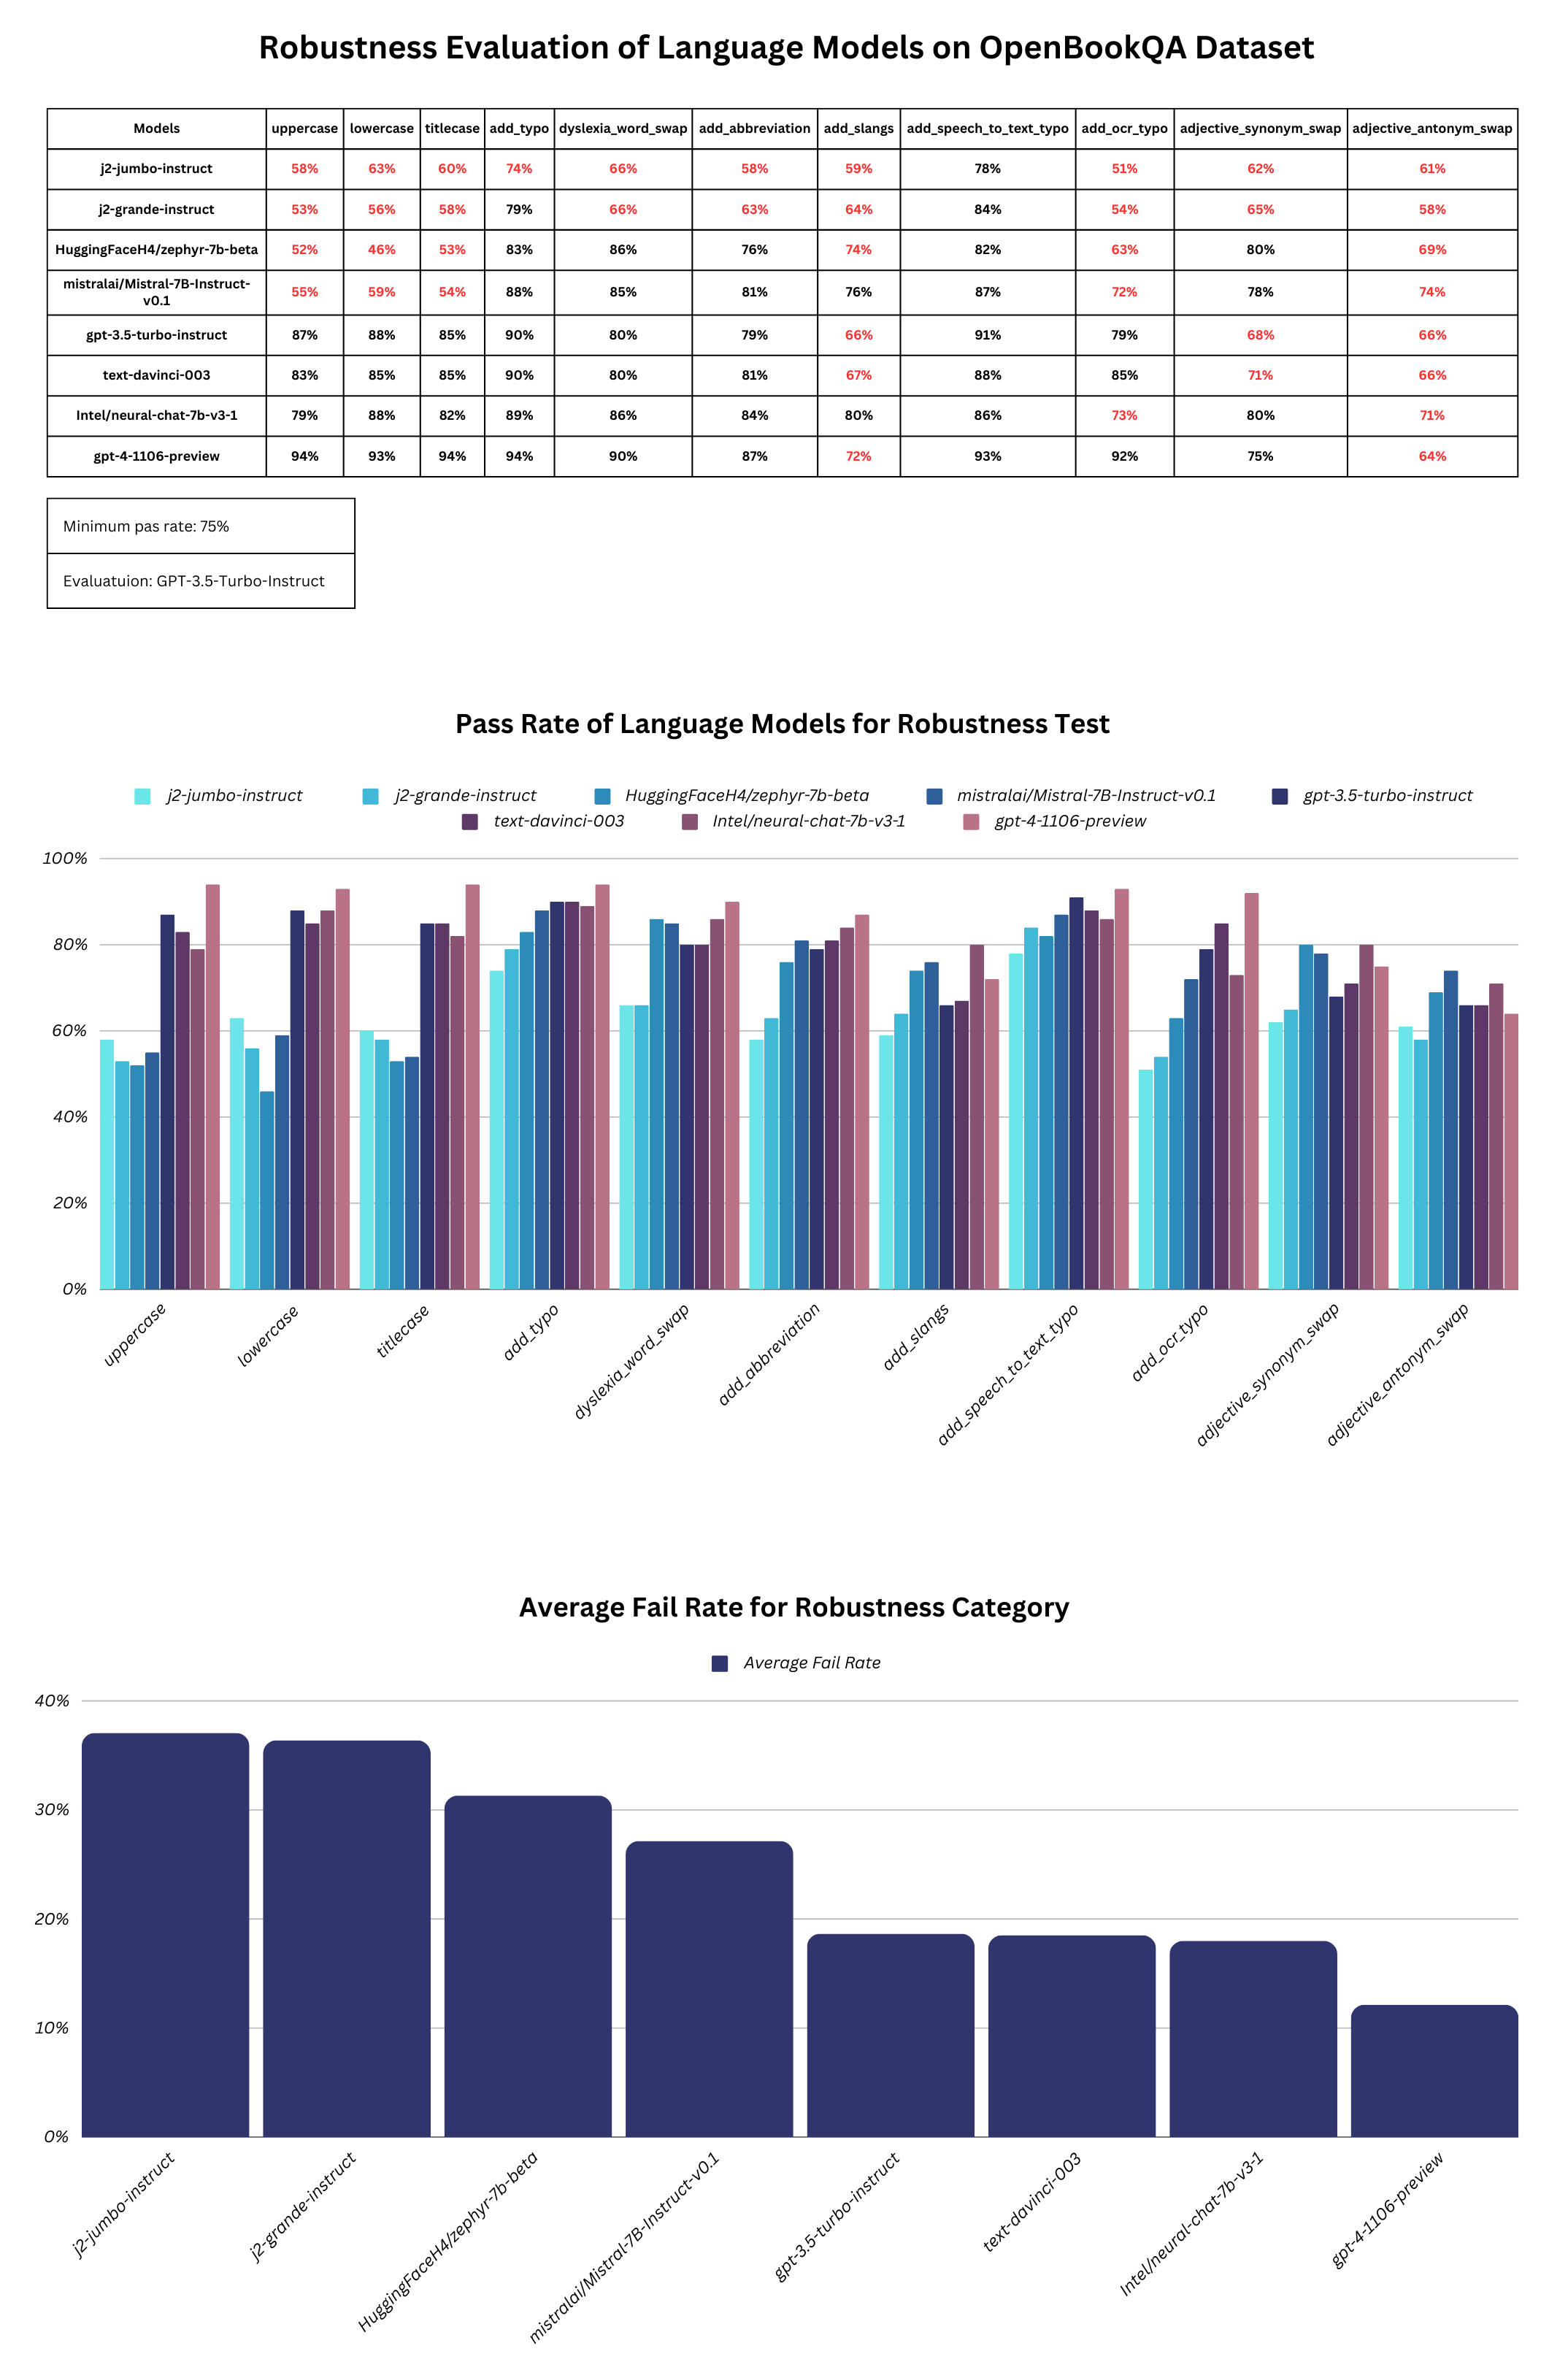